# Leveraging SMS Messages to Predict Near Real-Time Alcohol Lapse in AUD

Patients

Coco Yu [](https://orcid.org/0000-0002-7731-0563) (Department of Psychology, University of Wisconsin-Madison)  
John J. Curtin [](https://orcid.org/0000-0002-3286-938X) (Department of Psychology, University of Wisconsin-Madison)  
December 9, 2024

AUD remains a prevalent, lasting and costly problem in the United States, yet few receive treatment due to barriers. Smart Digital Therapeutics (DTx) are emerging as a promising tool to address these barriers. They can potentially provide continuous risk monitoring and individualized support through personal sensing and algorithms. This study leverages SMS messages both three days and one week preceding a lapse episode to predict next-day alcohol lapse. We recruited 138 participants (65 males; 121 Whites non-Hispanic) in early recovery with a goal of abstinence. Self-reported alcohol use and text messages were obtained during a 3-month period. We enginnered features from LIWC and trained models with XGBoost. We used grouped, nested cross-validation to select the best model configuration. The median auROC was .53 (95% CI \[.52, .54\]) for the best model across the 300 folds in the inner loop. Our model performed consistently worse for people from different underprivileged groups. We further calculated SHAP values and discovered that social processes, social behaviors and second person pronoun emerge as the most important features. Our study suggests that the LIWC model fails to capture sufficient signal from SMS messages to be clinically useful. Our next step is to use other natural language processing methods to do feature engineering and compare the results with this baseline LIWC model. Future studies should also consider other data sources to improve model performance.

In [ ]:
options(conflicts.policy = "depends.ok")

library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

here() starts at /Users/yujiachen/Desktop/github/study_messages

ℹ SHA-1 hash of file is "a58e57da996d1b70bb9a5b58241325d6fd78890f"

# Introduction

AUD remains a prevalent, lasting and costly problem in the United States. According to 2022 NSDUH ([National Institute on Alcohol Abuse and Alcoholism, 2023a](#ref-nationalinstituteonalcoholabuseandalcoholismAlcoholTreatmentUnited2023), [2023b](#ref-nationalinstituteonalcoholabuseandalcoholismAlcoholUseDisorder2023)), an estimate of 29.5 million (10.5% of the population) individuals aged 12 or older had AUD in 2022, which is consistent with the estimates for 2021. AUD problems have also brought huge economic burdens to the U.S., where excessive alcohol use has cost \$223.5 billion in 2006 and \$249 billion in 2010 ([Sacks et al., 2015](#ref-sacks2010NationalState2015a)).

Despite the high prevalence of AUD, limited number of individuals receive alcohol treatments. Only a small portion (7.6%) of individuals aged 12 or older with AUD acquired alcohol use treatment in the past year ([National Institute on Alcohol Abuse and Alcoholism, 2023a](#ref-nationalinstituteonalcoholabuseandalcoholismAlcoholTreatmentUnited2023), [2023b](#ref-nationalinstituteonalcoholabuseandalcoholismAlcoholUseDisorder2023)). This low treatment acquisition rate is even more pronounced for individuals from disadvantaged groups. Disparities in treatment-seeking behavior based on race, gender, and age are evident ([Abraham et al., 2020](#ref-abrahamAvailabilityMedicationsTreatment2020); [DiBartolo & Jarosinski, 2017](#ref-dibartoloAlcoholUseDisorder2017); [Kaufmann et al., 2014](#ref-kaufmannTreatmentSeekingBarriers2014); [Schuler et al., 2015](#ref-schulerPerceivedBarriersTreatment2015); [Verissimo & Grella, 2017](#ref-verissimoInfluenceGenderRace2017); [Young et al., 2018](#ref-youngDifferencesPerceptionsPractices2018)). Only 6.6% of Black or African-American people, 3.8% of people of two or more races, and 4.8% of Hispanic or Latino people with past-year AUD received treatments ([National Institute on Alcohol Abuse and Alcoholism, 2023a](#ref-nationalinstituteonalcoholabuseandalcoholismAlcoholTreatmentUnited2023), [2023b](#ref-nationalinstituteonalcoholabuseandalcoholismAlcoholUseDisorder2023)). Women are less likely to obtain treatments compared to men, even if they have equivalent level of perceived need for help ([Gilbert et al., 2019](#ref-gilbertGenderDifferencesUse2019b)).

Several obstacles hinder people’s utilization of treatment options. Previous studies have identified that AUD patients face financial barriers ([Kaufmann et al., 2014](#ref-kaufmannTreatmentSeekingBarriers2014); [Schuler et al., 2015](#ref-schulerPerceivedBarriersTreatment2015)), lack of knowledge or awareness ([May et al., 2019](#ref-mayBarriersTreatmentAlcohol2019); [Probst et al., 2015](#ref-probstAlcoholUseDisorder2015); [Williams et al., 2018](#ref-williamsBarriersFacilitatorsAlcohol2018)), social stigma ([Finn et al., 2023](#ref-finnPerceivedBarriersSeeking2023); [May et al., 2019](#ref-mayBarriersTreatmentAlcohol2019); [Sedarous & Flemming, 2023](#ref-sedarousCultureStigmaInequities2023); [Wallhed Finn et al., 2014](#ref-wallhedfinnAlcoholConsumptionDependence2014)), and geographical barriers ([Gregory et al., 2022](#ref-gregoryFirstlineMedicationsOutpatient2022)) for accessing care. Individuals with disadvantaged demographic background suffer from even heightened barriers to treatment resources. Women with high severity of alcohol use face larger fear of stigma compared to their male counterparts ([Finn et al., 2023](#ref-finnPerceivedBarriersSeeking2023)). Provider availability in rural areas, fear of stigma, and economic hardship all contribute to racial, gender and age disparities in treatment seeking ([Abraham et al., 2020](#ref-abrahamAvailabilityMedicationsTreatment2020); [DiBartolo & Jarosinski, 2017](#ref-dibartoloAlcoholUseDisorder2017); [Kaufmann et al., 2014](#ref-kaufmannTreatmentSeekingBarriers2014); [Schuler et al., 2015](#ref-schulerPerceivedBarriersTreatment2015); [Verissimo & Grella, 2017](#ref-verissimoInfluenceGenderRace2017); [Young et al., 2018](#ref-youngDifferencesPerceptionsPractices2018)).

## DTx and smart DTx

DTx is an effective and accessible supplemental tool that may partially address extant challenges AUD patients face. DTx are evidence-based health software that deliver assessments, interventions, and other supports to patients to prevent, or manage a disease or disorder. They can be utilized to provide continuing care for AUD patients after treatment. Available evidence suggests they are generally effective for mental health conditions including AUD and demonstrate clear clinical advantages ([Gustafson et al., 2014](#ref-gustafsonSmartphoneApplicationSupport2014b); [Lecomte et al., 2020](#ref-lecomteMobileAppsMental2020); [Philippe et al., 2022](#ref-philippeDigitalHealthInterventions2022)). Further, DTx may provide better access for hard-to-reach populations, including those from socially marginalized group who encounter increased barriers to access continuing support. They can benefit patients from rural areas with low provider availability as they are accessible remotely via mobile phones ([Bucci et al., 2019](#ref-bucciTheyAreNot2019); [N. Jacobson et al., 2023](#ref-jacobsonUsingDigitalTherapeutics2023)). DTx also have potentials to relieve barriers to seek professional help resulting from stigma concerns as they can facilitate anonymity and shorten the need for in-person interactions. They are of lower costs compared to in person care and have the capacity to be scalable.

The concept of “smart” DTx is emerging in recent years allowing us to expand the benefits of DTx. Smart DTx comprises two key components. First, they rely on personal sensing methods to collect data. Exemplary measures include EMA, which actively prompts users to complete surveys and can encompass desired questions on moods, social relationships, stressful events, etc. Other relatively lower-burden sensing approaches include the measurement of geolocation, phone call logs and text messages collection. Those measures continuously and passively gather information. They can thus provide longitudinal data that can be temporally precise. Combined with self-reports that acquire contextual information (e.g., levels of support users can obtain from their frequently contacted people), they constitute rich data source for smart DTx.

Second, smart DTx incorporates the rich dataset extracted from personal sensing to build machine learning algorithms. The goal of such models is to identify *who* are at heightened risk for alcohol lapses, *when* they will lapse, and *why* they are at increased risk. Through the embedded algorithms, smart DTx can achieve two tasks: 1) continuous AUD relapse risk-monitoring; and 2) individualized clinical support when needed.

To enhance the effectiveness of smart DTx, those predictive modeling should be accurate and temporally precise. In other words, they should be capable of detecting increased lapse risks in a timely manner. These predictions allow windows for subsequent support to prevent lapses targeting a specific person. Notably, these functions are very important given the dynamic nature of alcohol relapse. Some relapse factors (e.g., drinking partner, drinking behavior) are situated and can be fluctuating over time. They usually occurs before an episode of alcohol use ([Chih et al., 2014](#ref-chihPredictiveModelingAddiction2014a)). They can be elusive to therapists’ attention due to infrequent visits, highlighting importance of sustained monitoring to prevent lapses. AUD is a chronic, dynamic and temporally varying disease where patients face constant challenges of relapsing after abstinence ([Andersson et al., 2019](#ref-anderssonRelapseInpatientSubstance2019); [Scott et al., 2005](#ref-scottPathwaysRelapseTreatment2005); [Witkiewitz & Marlatt, 2007](#ref-witkiewitzModelingComplexityPosttreatment2007a)). This requires constant monitoring over time and timely intervention when necessary.

Importantly, the machine learning models should also predict well among individuals from disadvantaged groups. One of the key benefits of DTx is that they partially address barriers utilizing professional help by providing 24/7/365, affordable, personalized support. They are particularly beneficial to marginalized groups who have low rates of utilizing treatment options due to these treatment barriers. However, they might exacerbate health inequity if embedded algorithms perform relatively worse for less privileged groups. To improve algorithm fairness among different demographic subgroups, the models can incorporate a diverse representation of sample to complete model training. On the other hand, the models should derive more “fair” features. For example, models might be biased if they leverage theory-driven features only. These features might be biased against disadvantaged groups because they depend on decades of research on White males.

To develop such algorithms, we must first identify a clinically relevant outcome to predict. This outcome should be clearly and precisely defined across individuals, easy to measure, and with high temporal precision. Relapse, which usually refers to the return of a symptomatic behavior, is hard to quantify due to its multidimensional nature and temporal coarseness ([Miller, 1996](#ref-millerWhatRelapseFifty1996)). One potential conceptualization of alcohol relapse is linked to problems of use. Nonetheless, negative consequences are multifaceted and can therefore be burdensome to collect. It is also unclear what the onset of problems are. Another possible outcome is quantity of alcohol use. However, this measure is not temporally precise because there will be a time lag between onset of drinking and the last drink completed. Levels of drinking might also mean differently for individuals with different AUD severity, which makes it hardly generalizable across individuals. Alternatively, in this study, we utilize lapse (i.e., a single episode of alcohol use) as our primary outcome variable. Lapses are easy to define, have a clear onset, and are also clinically meaningful. They can serve as an early warning sign of failure to sustain a desired behavioral change ([Chung & Maisto, 2006](#ref-chungRelapseAlcoholOther2006a); [Marlatt & Donovan, 2005](#ref-marlattRelapsePreventionMaintenance2005a)). Research has also shown that initial lapse and frequent lapses are the associated with enhanced risk of relapse ([Högström Brandt et al., 1999](#ref-hogstrombrandtPredictionSingleEpisodes1999a); [Witkiewitz & Marlatt, 2004](#ref-witkiewitzRelapsePreventionAlcohol2004b)).

Next, we need to determine what inputs to use for our prediction model. The features should be easy to measure and feasible. The widespread availability of smartphones has rendered constant data collection with DTx attainable. Data collection procedure should not be unduly burdensome to users to ensure that sensing is sustainable. Previous research has established satisfying acceptability of active self-report measures such as EMA and even more willingness to use passive sensing measures ([Wyant et al., 2024](#ref-wyantMachineLearningModels2024)). The features should also be well-validated. For example, GPS tracking has high accuracy in locating individuals and is temporally precise. Text sensing captures precisely the interactions between users and other individuals via SMS.

Smart DTx algorithms should also incorporate features that are interpretable and can map on to current interventions. Exemplary features that are highly interpretable include those derived from the theory-driven approach. These features are easy to interpret and closely align with established therapies. For example, features related to social relationship might have important implications for family or marital counseling. Affect state features might be informative of emotion-focused therapy. In addition to selecting interpretable features during data training, computational methods can also be used to enhance model interpretability by analyzing feature importance. For instance, we can examine global feature importance to determine which features contribute the most to predict lapses across individuals. Further, examining local feature importance (i.e., features influencing a single observation) in these models might also be helpful for model interpretation. They have benefits of identifying the factors that contribute to lapse risk for any specific person and moment in time.

## Recent progress in smart DTx

Machine learning models leveraging ecological momentary assessment (EMA) measures have performed relatively well to predict goal-inconsistent alcohol use (e.g., lapses). Our group developed an XGBoost machine learning model using self-reported craving, affect, efficacy, risky situations, stressful events, pleasant events to predict alcohol lapses in the next hour, day, or week ([Wyant et al., 2024](#ref-wyantMachineLearningModels2024)). The surveys were collected up to four times daily for three months. The model achieved exceptional performance when predicting lapses for new individuals, with a mean auROC score of .89, .90 and .93 for the hour-, day-, and week-level model respectively. Global feature importance demonstrated that past alcohol use and future self-efficacy consistently contributed greatly across all models to predict lapses.

Nonetheless, relying on EMA measures for model building is associated with several limitations. First, constantly completing surveys makes it burdensome for real-world DTx use. Although most EMA relevant mental health research demonstrated modest compliance rates, their time windows last from two weeks to three months ([Czyz et al., 2018](#ref-czyzEcologicalAssessmentDaily2018); [Hung et al., 2016](#ref-hungSmartphonebasedEcologicalMomentary2016); [Mackesy-Amiti & Boodram, 2018](#ref-mackesy-amitiFeasibilityEcologicalMomentary2018); [Porras-Segovia et al., 2020](#ref-porras-segoviaSmartphonebasedEcologicalMomentary2020); [van Genugten et al., 2020](#ref-vangenugtenExperiencedBurdenAdherence2020a)). The study length is insufficient for real-world DTx use. As extended period of time of app use is anticipated, users’ perceived burden of answering surveys is presumably larger ([Mogk et al., 2023](#ref-mogkImplementationWorkflowStrategies2023)). This is particularly problematic as AUD is a chronic disease that requires constant risk monitoring. Although minimizing the number of items in the surveys and the frequency of prompting users to complete the surveys might help mitigate the associated burden, it can inevitably reduce the prediction precision and temporal precision of algorithms.

Second, decisions regarding what constructs to assess and what items to include to assess these constructs are limited by theory and past data. Given this, we might miss important constructs that predict lapses among individuals from groups that have been less well-studied. Including risk factors solely drawn from decades of research on White, male-dominant samples might even exacerbate health disparities when applied to DTx. Further, our current understanding of alcohol relapse precursors is not comprehensive. For example, Marlatt’s proposed taxonomy characterizes high-risk situational precursors to alcohol relapse such as social pressure and positive/negative emotional state ([Marlatt, 1996](#ref-marlattTaxonomyHighriskSituations1996a)). Nonetheless, replication studies have found this theoretical framework to be somewhat unreliable and have low predictive validity of post-treatment outcomes ([Kadden, 1996](#ref-kaddenMarlattRelapseTaxonomy1996); [Lowman et al., 1996](#ref-lowmanReplicationExtensionMarlatt1996a); [Stout et al., 1996](#ref-stoutPredictiveValidityMarlatt1996)). A review study also suggests that current relapse factors are not well-understood in past research due to methodological constraints and a death of “near real-time” data ([McKay et al., 2006](#ref-mckayConceptualMethodologicalAnalytical2006b)).

## Incorporating SMS in smart DTx

Text sensing technology, which is both feasible and sustainable, represents new opportunities in DTx that might address limitations of the current active reporting approach. Since AUD is a chronic condition requiring ongoing risk monitoring over an extended period, DTx can benefit from SMS sensing because it places a low burden on users and allows for continuous data collection. Studies collecting passive data have demonstrated high acceptability from participants and higher compliance rates compared to active measures ([Beukenhorst et al., 2022](#ref-beukenhorstUsingSmartphonesReduce2022a); [Wyant et al., 2023](#ref-wyantAcceptabilityPersonalSensing2023a)). Further, risk monitoring using SMS sensing is temporally sensitive to fluctuating risks. Analyzing text messages can detect potential triggers in time without actively prompting users to reflect on their feelings at the moment or report their environment.

Linguistic Inquiry and Word Count (LIWC) is a well-established text analysis tool that can potentially work well to predict alcohol lapses. It counts the frequency of words that fall into different categories to analyze a variety texts ([Pennebaker et al., 2015](#ref-pennebakerDevelopmentPsychometricProperties2015a)). LIWC might have good performance because they allow researchers to mine previously established robust construct of alcohol lapse precursors. It involves domain-specific knowledge of known risks for alcohol lapses. For instance, the majority of an inpatient teen sample reported initial relapse to alcohol when offered alcohol, when in negative state, and when in interpersonal conflicts ([Brown et al., 1989](#ref-brownCharacteristicsRelapseFollowing1989)). Other commonly found risk factors include alcohol craving ([Korlakunta et al., 2012-07/2012-12](#ref-korlakuntaReasonsRelapsePatients2012); [McKay, 1999](#ref-mckayStudiesFactorsRelapse1999a)), negative affect state ([McKay, 1999](#ref-mckayStudiesFactorsRelapse1999a)), cognitive factors ([McKay, 1999](#ref-mckayStudiesFactorsRelapse1999a)), and interpersonal problem ([McKay, 1999](#ref-mckayStudiesFactorsRelapse1999a)). LIWC might be capable of mining those risk-relevant factors because it incorporates a dictionary of words associated with social processes, affect, and substances.

Models leveraging LIWC can also benefit from the word categories that have not been explored in past research (e.g., pronouns, clout). This approach is less susceptible to our knowledge gap and might even be capable of identifying unrecognized risk factors for alcohol lapses. We might even expect less differential performance under the bottom up approach across privileged vs. unprivileged groups because the features are not drawn from past research dominated by White males with AUD and are thus potentially unbiased towards privileged groups.

Text analysis also offers avenues for model interpretation to yield valuable insights into treatment recommendations. LIWC can generate features that are highly interpretable and some might even relate to extant interventions. Assessing their feature importance helps us understand how features contribute to the models (i.e., which features are robust in predicting lapses). For example, global feature importance can identify robust predictors across individuals in predicting lapses. Local feature importance provides insights on what contributes to a lapse for a specific person at a specific time. They can be useful in personalized treatment recommendations.

## Current Study

In the current study, we ran participants text messages over a period of three months feature engineering techniques through the LIWC program. We used generated features as inputs to models that predict alcohol lapses. We evaluated both model performance and interpretability of each distinct method. Followings are the more specific aims:

**Aim 1: Train and evaluate performance of machine learning models using language features derived from LIWC to predict alcohol lapses.** We used LIWC to engineer features from raw SMS messages. For each distinct feature set derived from a variety of configurations, we trained machine learning models a contemporary statistical algorithms (XGBoost). We evaluated and statistically compared the model performance, quantified as area under the receiver operating characteristic curve (auROC).

**Aim 2: Identify important features and evaluate their interpretability with respect to recommending interventions.** Model interpretation is key to providing treatment recommendations and uncovering potential causes of lapses. We used contemporary approaches to quantify feature importance (e.g., SHAP) of features within each of the NLP techniques used.

**Aim 3: Examine model fairness in historically underprivileged subgroup populations.** It is also important to note that if embedded algorithms perform relatively worse for marginalized groups, their use can exacerbate rather than alleviate treatment disparities. As such, model performance between privileged vs. unprivileged groups should be carefully examined. We evaluated model performance in demographic subgroups that face excessive barriers accessing alcohol treatments or medications, including females, racial minorities, individuals living under poverty, and older population.

# Approach

## Overview

This study analyzed data collected from 2017-2019 from a larger grant funded by National Institute of Alcohol Abuse and Alcoholism (R01 AA024391). In this paper, we focus on methods and measures that are relevant to this study. Additional details on broader methods and the full set of measures collected are described elsewhere (see https://osf.io/w5h9y/ and ([Wyant et al., 2023](#ref-wyantAcceptabilityPersonalSensing2023a); [Wyant et al., 2024](#ref-wyantMachineLearningModels2024))).

## Participants

Individuals in early recovery from AUD were recruited from Madison and surrounding area via social media platforms (e.g., Facebook), referrals from clinics, and television and radio advertisements. After initial phone screen, interested individuals came in-person to complete a more in-depth screening to determine their eligibility. We documented their demographic information. Inclusion criteria include that participants: 1) must be at least aged 18 or older; 2) must meet criteria for AUD with at least moderate severity (\>four DSM-5 criteria); 3) must be abstinent from alcohol for at least one week and fewer than two months at time of intake; 4) must be able to read and write in English; 5) must be willing to use smartphone and their smartphone is compatible with our study technology. Participants were excluded if they have a lifetime history of severe and persistent mental illness. One hundred sixty-nine participants were eligible and enrolled in the study. After excluding participants who discontinued before the first follow-up session and those with low compliance rates and too few messages (\<100 messages), we have a final sample size of 138 participants.

## Procedures

The study lasted up to three months with five in-person visits (see <a href="#fig-simp" class="quarto-xref">Figure 1</a>). Participants completed an in-person screening visit to determine their eligibility, obtain their informed consent, and collect their demographic information and self-report measures. They then completed an intake session one week later and three follow-up visits afterwards spaced at one-month intervals. During each of the follow-up visits, a research assistant downloaded participants’ SMS messages from their phone, verified reports of lapses and queried participants about any additional unreported laspes. Additional self-reported measures were obtained (see https://osf.io/w5h9y/).

Throughout the course of the study, participants were expected to complete four daily EMAs that asked about their alcohol cravings, risky situations, stressful/pleasant events, etc ([Wyant et al., 2024](#ref-wyantMachineLearningModels2024)). Notably, in the first item in the EMA survey, participants also reported their past alcohol use. Answer to this item will be used as the predicted outcome (see *Section Alcohol Lapses*).

<figure id="fig-simp">
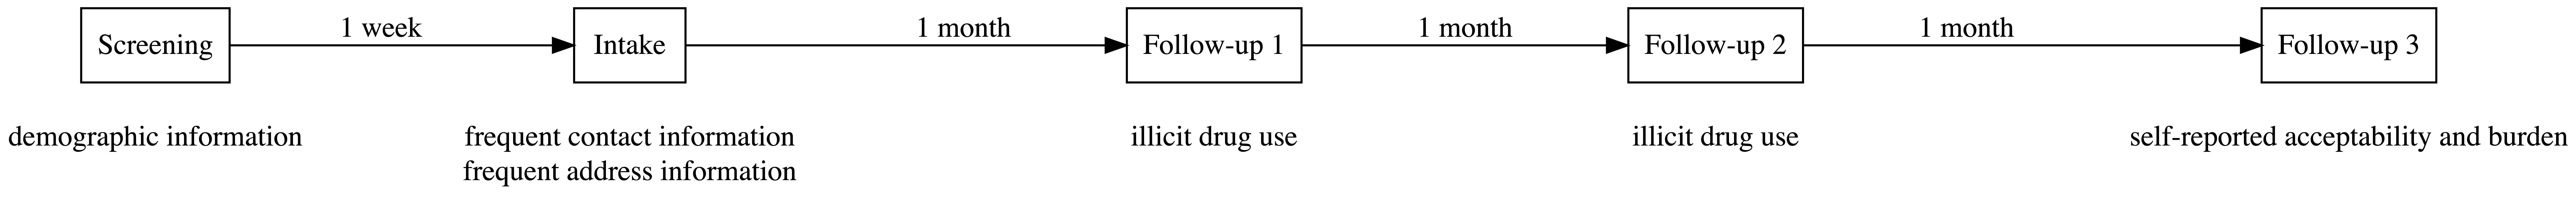
<figcaption>Figure 1: Flowchart of in-person visits. We obtained participant demographics and alcohol use history from the screening session. SMS messages were downloaded from participant phones at each of the follow-up visit.</figcaption>
</figure>

## Measures

### Individual Characteristics

We collected participants’ individual characteristics including their demographics and their past drinking history during the screening session (see <a href="#tbl-measures" class="quarto-xref">Table 1</a>).

| Log Type | Measure |
|:---|:---|
| Demographics | Age |
|  | Sex |
|  | Race |
|  | Ethnicity |
|  | Highest Education |
|  | Employment Status |
|  | Total Personal Gross Income |
|  | Marital Status |
| Alcohol Use | Alcohol Use History |
|  | DSM-5 Checklist for AUD |
|  | Young Adult Alcohol Problems Test |
|  | WHO-The Alcohol, Smoking and Substance Involvement Screening Test |

Table 1: Participant self-reported measures

### Alcohol Lapses

Participants were prompted up to four times daily to report their recent alcohol use. In the first item of each daily EMA survey, dates and times of any unreported past alcohol use were obtained. Reports of past alcohol use were used as a dichotomous outcome variable (Lapse vs. No Lapse). We predicted alcohol lapses in the next 24-hour window (i.e., next day lapse prediction). Every outcome window started from 4 a.m. everyday and end 24 hours later.

### SMS Messages

At each of the follow-up visits, a research assistant downloaded the participants’ SMS message logs from their phone. These logs included the message type (incoming vs. outgoing), date and time sent/received, text body, contact name, whether the participants read the text or not, etc. Images and voice texts were excluded from analysis. Both group messages and one-on-one messages were obtained from participants’ phones. We included only messages from/to important contacts and in group chats.

For each individual lapse window, we had predictor sets that differ in prediction window length and their analytic unit. We defined text prediction windows to be 3-day and 1-week preceding the lapse window (see <a href="#fig-window" class="quarto-xref">Figure 2</a>). We analyzed the two prediction windows both individually and combined (i.e., three configurations in total).

<figure id="fig-window">
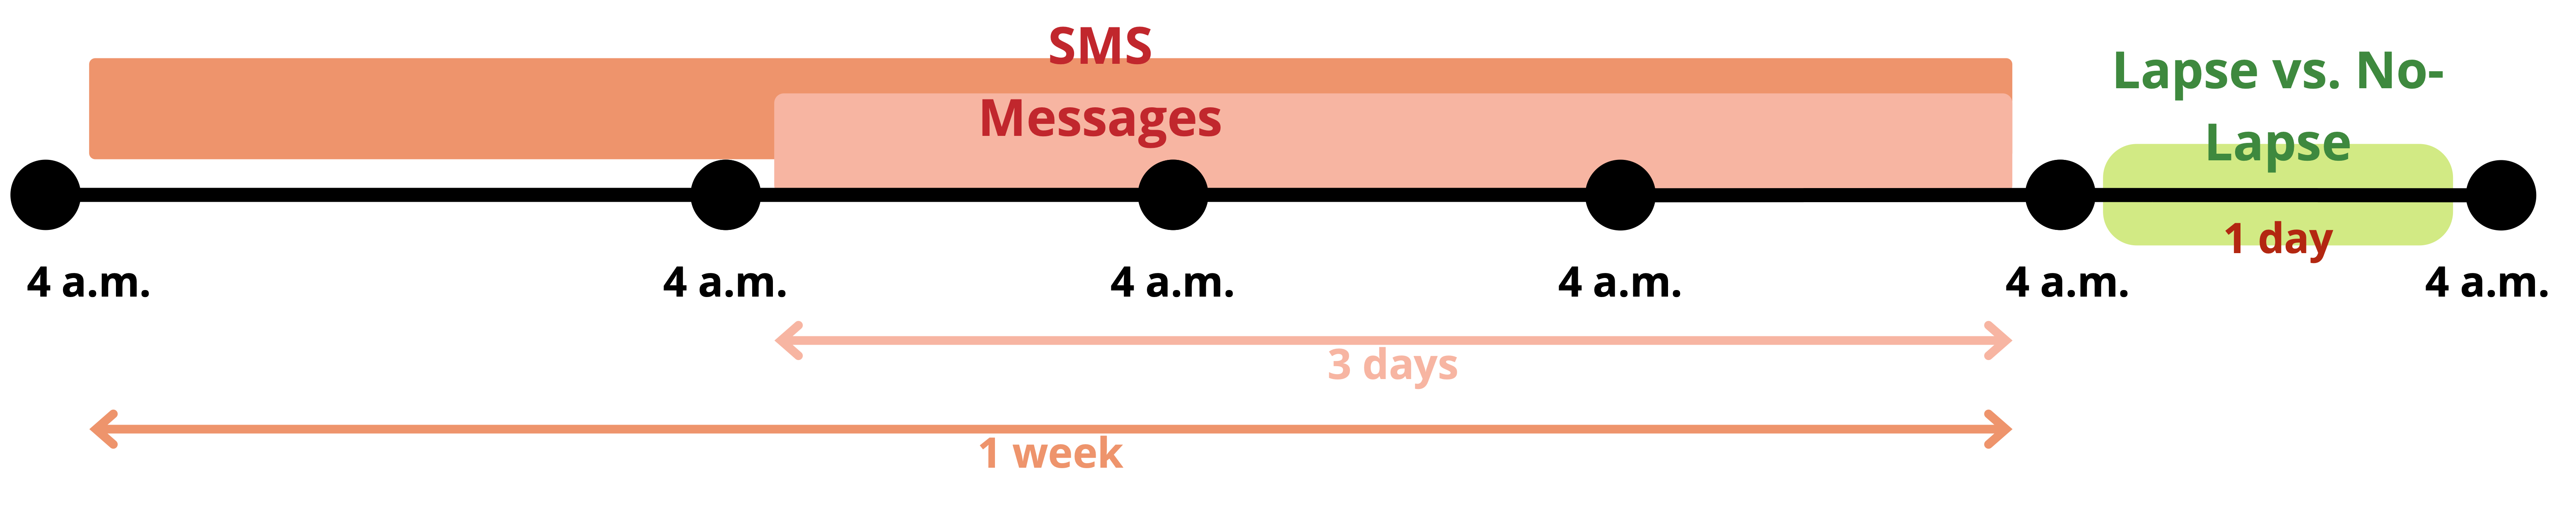
<figcaption>Figure 2: Prediction Window</figcaption>
</figure>

## Model Training

### Feature Engineering

Text messages served as the only raw source for all feature engineering. The document sets (varying based on unit of analysis) went through a generic pre-processing step that involves removal of all emojis. Our decision to remove all emojis was due to loss of emoji data in the ios devices during back up. This study used the LIWC dictionary ([Pennebaker et al., 2015](#ref-pennebakerDevelopmentPsychometricProperties2015a)) and computed scores by counting frequency of words that belong to each category. We did not remove any stop words. LIWC aligns with the current alcohol relapse risk factor literature in that it examines psychometric properties including cognitive state and social processes ([Brown et al., 1989](#ref-brownCharacteristicsRelapseFollowing1989); [McKay, 1999](#ref-mckayStudiesFactorsRelapse1999a), [1999](#ref-mckayStudiesFactorsRelapse1999a)).

We adopted two configurations for analytic units – individual messages and concatenated messages. In the first configuration method, we ran individual messages within the defined prediction window through LIWC. We then normalized LIWC feature scores based on the square root of word counts instead of raw word counts which was the default choice from the program. We applied the normalization on all LIWC categories other than word count, word per sentence, and the four summary measures – analytic, clout, authenticity, and tone. We excluded the four summary categories because their raw scores were not normalized on raw word counts. Our normalization method was chosen due to the relatively short message length for individual messages. We further obtained the median and 95% percentile of normalized LIWC scores for all messages related to each lapse label.

In the other analytic unit configuration, we first concatenated all messages associated with each lapse label altogether. We then obtained LIWC results for the concatenated messages. We further adopted three configurations for normalization methods – normalized on raw word count (i.e., default method from the program), normalized on the square root of word count, and a combination of these two.

### Candidate Algorithm

We leveraged the XGBoost algorithm that differed on the above three configurations: 1) prediction window length (see *Section SMS Messages*); 2) analytic units (see *Section Feature Engineering*); and 3) normalization methods (see *Section Feature Engineering*). As we have a fairly imbalanced class labels in our dataset (see *Section Sample Distribution*), we further considered different resampling strategies including upsampling and downsampling with different ratios. Our decision to use the XGBoost algorithm was based on its two benefits. First, the algorithm has demonstrated satisfying performance in classifying lapse vs. no lapse in our lab’s previous work ([Wyant et al., 2024](#ref-wyantMachineLearningModels2024)). We can select the best model from a range of model-specific hyperparameters (mtry, tree depth, and learning rate), on top of the four above manually incorporated configurations. Second, XGBoost is well-suited to calculate Shapley values that can help us understand each feature’s contributions to model output (see *Section Feature Importance*).

### Model Selection

We performed grouped, nested cross-validations to perform hyperparameter tuning and select the best model configuration. The dataset was participant-grouped so that each individual was assigned to either held-in or held-out set to avoid bias of predicting participants’ lapses using their own data. The nested cross-validation method uses two nested loops to divide folds. In the inner loop, held-out folds were used as a validation set for model selection. In the outer loop, held-out folds were utilized as a test set for model evaluation. We only presented validation results from the 300 sets in the inner loop in this paper because we are still working on model development. We reserved test set to evaluate the overfitting of final full model.

The primary performance metric to select the best model configuration and evaluate the model performance on the test sets was auROC. The auROC measures the probability that a randomly chosen positive case is assigned a higher score than a randomly chosen negative case. It reflects the model’s ability to distinguish between the positive and negative cases across all possible thresholds. Values between .70 and .80 are considered fair, values between .80 and .90 are considered good, and values above .90 are considered excellent. Across all models that differed on the above discussed configurations, the best model was selected based on the highest median auROC across all validation sets (see *Section Machine Learning Algorithm*).

## Model Evaluation

### Performance Evaluation

We calculated the predicted probability scores for all our observations based on the best model configuration and then obtained the median auROC score across all 300 validation sets in the inner fold. We further performed a Bayesian hierarchical generalized linear model to estimate the posterior probability (i.e., the likelihood of achieving the results given out data) distributions of the auROCs. The two random intercepts in the models included the repeat and the fold within repeat. We reported the 95% CIs for our models’ auROCs and determined if they included .5 (chance performance). If this CI included 0.5, we would conclude that our model performed no better than random guess. We also reported the probability that the model auROC is \>.05.

### Algorithmic Bias

A subset of individual characteristic measures was used to evaluate model fairness on subgroups. We compared model performance among each sex, racial, age and income subgroups because the populations face increased barriers obtaining AUD treatments. Stigma among older populations and wome, and economic hardship in racial minority groups can all contribute to low treatment-seeking and alcohol treatment completion ([DiBartolo & Jarosinski, 2017](#ref-dibartoloAlcoholUseDisorder2017); [J. O. Jacobson et al., 2007](#ref-jacobsonRacialDisparitiesCompletion2007); [May et al., 2019](#ref-mayBarriersTreatmentAlcohol2019)). Participants younger than 55 years old were considered as a privileged group. We adopted half of median income in Madison area in 2017 as cut-off to assign participants to income groups.

We performed a Bayesian hierarchical generalized linear model that regressed the auROCs from the 300 validation sets in the inner loop as a function of group membership (privileged group vs. unprivileged group within each of above individual characteristics). We reported the 95% CI for model performance differences and examined if they included 0. If this CI did not include 0, we would conclude that our model was unfair. We also reported the probability that the difference is greater than zero.

### Feature Importance

We also calculated SHAP values to interpret the results. SHAP is a game theory based method to explain how each feature influences the model output ([Lundberg & Lee, 2017](#ref-lundbergUnifiedApproachInterpreting2017)). It assigns importance to each feature, where a positive feature importance positively affects the model output. This methodology can be applied to any machine learning algorithm and can increase model transparency and interpretability. Local Shapley values explain factors that contribute to a single observation, and global Shapley values represent feature importance across all observations. To compute global Shapley values, we averaged the absolute value of all local Shapley values. For better understanding, we aggregated Shapley values for each LIWC category, regardless of their prediction window and normalization methods.

# Results

In [ ]:
# Load objects for results
labels <- read_csv(here::here(path_messages, "lapses.csv"), col_types = cols()) |> 
  mutate(day_start = as_datetime(day_start, tz = "America/Chicago"),
         day_end = as_datetime(day_end, tz = "America/Chicago"))

raw_data <- read_csv(here(path_messages, "eda", "eda_raw.csv"))

Rows: 313492 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): id_obs, subid, text_length

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 915833 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): lapse
dbl  (2): id_obs, subid
lgl  (1): na
dttm (1): day_start

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 2086041 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): lapse
dbl  (2): id_obs, subid
lgl  (1): na
dttm (1): day_start

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 468 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): skim_type, skim_variable
dbl (5): complete_rate, numeric.sd, numeric.p0, numeric.p50, numeric.p100

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 468 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): skim_type, skim_variable
dbl (5): complete_rate, numeric.sd, numeric.p0, numeric.p50, numeric.p100

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 300 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): inner_split_num, outer_split_num, auroc

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 4 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): group
dbl (4): median, lower, upper, prob

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

## Demographics

The final sample includes 138 participants. On average, participants are 39.60 years old (SD = 11.17, range = 21-66). 65 (47.10%) participants are females, 121 (87.68%) are White/Caucasian, 3 (2.17%) are American Indiain/Alaska Native, 2 (1.45%) are Asian, 6 (4.35%) are Black/African American, and 6 (4.35%) are Other/Multiracial. See <a href="#tbl-demographics" class="quarto-xref">Table 2</a> for more details on participant demographics (education, employment, income, marital status) and their patterns of alcohol use.

|  | N | % | M | SD | Range |
|:---------------------------------------------------|:--:|:--:|:--:|:--:|:--:|
| **Age** | — | — | 39.60 | 11.17 | 21-66 |
| **Sex** |  |  |  |  |  |
| *Female* | 73 | 52.90% | — | — | — |
| *Male* | 65 | 47.10% | — | — | — |
| **Race** |  |  |  |  |  |
| *White/Caucasian* | 121 | 87.68% | — | — | — |
| *American Indian/Alaska Native* | 3 | 2.17% | — | — | — |
| *Asian* | 2 | 1.45% | — | — | — |
| *Black/African American* | 6 | 4.35% | — | — | — |
| *Other/Multiracial* | 6 | 4.35% | — | — | — |
| **Ethnicity** |  |  |  |  |  |
| *Mexican, Mexican American, Chicano* | 3 | 2.17% | — | — | — |
| *Another Hispanic, Latino, or Spanish Origin* | 1 | 0.72% | — | — | — |
| *Not Hispanic, Latino, or Spanish Origin* | 134 | 97.10% | — | — | — |
| **Highest Education** |  |  |  |  |  |
| *2-Year degree* | 13 | 9.42% | — | — | — |
| *Advanced degree* | 23 | 16.67% | — | — | — |
| *College degree* | 54 | 39.13% | — | — | — |
| *High school or GED* | 11 | 7.97% | — | — | — |
| *Less than high school or GED degree* | 1 | 0.72% | — | — | — |
| *Some college* | 36 | 26.09% | — | — | — |
| **Employment** |  |  |  |  |  |
| *Disabled* | 4 | 2.90% | — | — | — |
| *Employed* | 96 | 69.57% | — | — | — |
| *Full-time student* | 7 | 5.07% | — | — | — |
| *Homemaker* | 1 | 0.72% | — | — | — |
| *Other, not otherwise specified* | 8 | 5.80% | — | — | — |
| *Retired* | 6 | 4.35% | — | — | — |
| *Temporarily laid off, sick leave, or maternity leave* | 3 | 2.17% | — | — | — |
| *Unemployed* | 13 | 9.42% | — | — | — |
| **Total Personal Gross Income** | — | — | 36,494.41 | 32,149.41 | 0-200,000 |
| **Marital Status** |  |  |  |  |  |
| *Divorced* | 40 | 29.90% | — | — | — |
| *Married* | 30 | 21.74% | — | — | — |
| *Never Married* | 61 | 44.20% | — | — | — |
| *Separated* | 5 | 3.62% | — | — | — |
| *Widowed* | 2 | 1.45% | — | — | — |
| **Alcohol Use History** |  |  |  |  |  |
| *Age of First Drink Without Family* | — | — | 14.62 | 2.98 | 6-24 |
| *Age of First Regular Drink* | — | — | 19.39 | 6.05 | 11-53 |
| *Age of First Drinking Problem* | — | — | 27.62 | 9.42 | 15-60 |
| *Age of First Quit Attempt* | — | — | 31.02 | 10.09 | 15-61 |
| *Number of Quit Attempts* | — | — | 5.98 | 9.83 | 0-100 |
| *Types of Programs or Services Used* |  |  |  |  |  |
| *Long-Term Residential Treatment (more than 6 months)* | 6 | 4.35% | — | — | — |
| *Short-Term Residential Treatment (less than 6 months)* | 41 | 29.71% | — | — | — |
| *Outpatient Treatment* | 64 | 46.38% | — | — | — |
| *Individual Counseling* | 91 | 65.94% | — | — | — |
| *Group Counseling* | 57 | 41.30% | — | — | — |
| *Alcoholics Anonymous/Narcotics Anonymous* | 84 | 60.87% | — | — | — |
| *Other* | 38 | 27.54% | — | — | — |
| *Even Taken Prescribed Medication* | 53 | 38.41% | — | — | — |
| *Number of Days per Week Consumed Any Alcohol* | — | — | 5.24 | 1.81 | 1-7 |
| *Number of Days per Week Consumed 6 or More Alcoholic Drinks in One Day* | — | — | 3.94 | 2.07 | 0-7 |
| *Number of Alcoholic Drinks per Day on Days Drinked* | — | — | 7.43 | 4.31 | 1-25 |
| **DSM-5 Symptom Count** | — | — | 8.89 | 1.84 | 4-11 |
| **Young Adult Alcohol Problems Test** | — | — | 19.90 | 4.60 | 6-27 |
| **Past 3-Month Drug Use (WHO-The Alcohol, Smoking and Substance Involvement Screening Test)** |  |  |  |  |  |
| *Tobacco products (cigarettes, chewing tobacco, cigars, etc.)* | 75 | 54.35% | — | — | — |
| *Cannabis (marijuana, pot, grass, hash, etc.)* | 64 | 46.38% | — | — | — |
| *Cocaine (coke, crack, etc.)* | 17 | 12.32% | — | — | — |
| *Amphetamine type stimulants (speed, diet pills, ecstasy, etc.)* | 15 | 10.87% | — | — | — |
| *Inhalants (nitrous, glue, petrol, paint thinner, etc.)* | 3 | 2.17% | — | — | — |
| *Sedatives or Sleeping Pills (Valium, Serepax, Rohypnol, etc.)* | 21 | 15.22% | — | — | — |
| *Hallucinogens (LSD, acid, mushrooms, PCP, Special K, etc.)* | 14 | 10.14% | — | — | — |
| *Opioids (heroin, morphine, methadone, codeine, etc.)* | 14 | 10.14% | — | — | — |

Table 2: Participant demographics and alcohol use history

## Sample Distribution

The final total number of lapse labels in the dataset is 11562. 7.63% of the labels are associated with a lapse episode. On average, each participant has 83.78 labels (sd = 11.35, median = 88.00, range = 30 - 90; see <a href="#fig-lapse_count" class="quarto-xref">Figure 3</a>).

``` python
labels |> 
  group_by(subid) |> 
  summarize(n = n()) |> 
  ggplot(aes(x = n)) + 
  geom_histogram(fill = "#97C4C5", bins = 70) +
  labs(y = "subject counts", x = "# of lapses")
```

<figure id="fig-lapse_count">
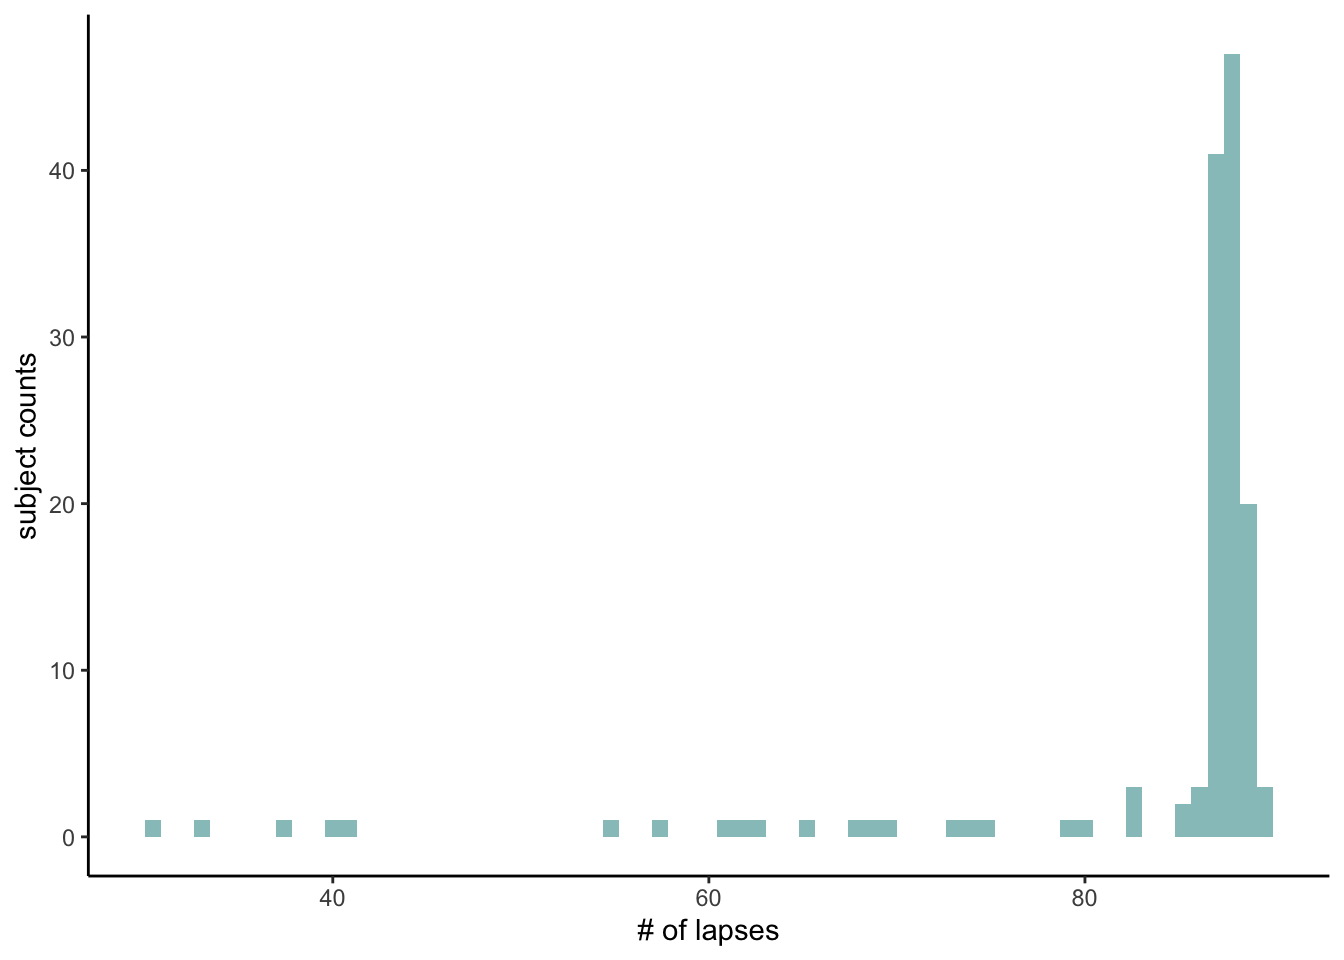
<figcaption>Figure 3: Distribution of Lapse Label Counts</figcaption>
</figure>

The total number of messages in the dataset is 313492. On average, each subject has 2271.68 messages (sd = 2536.60, range = 100 - 15884). The average message length across all participants is 10.42 words (sd = 14.30, median = 7.00, range = 1 - 1266). On average, each participant has a mean message length of 10.87 (sd = 3.97, range = 5.25 - 38.91).

``` python
ggpubr::ggarrange(plt1_raw, plt2_raw)
```

<figure id="fig-raw">
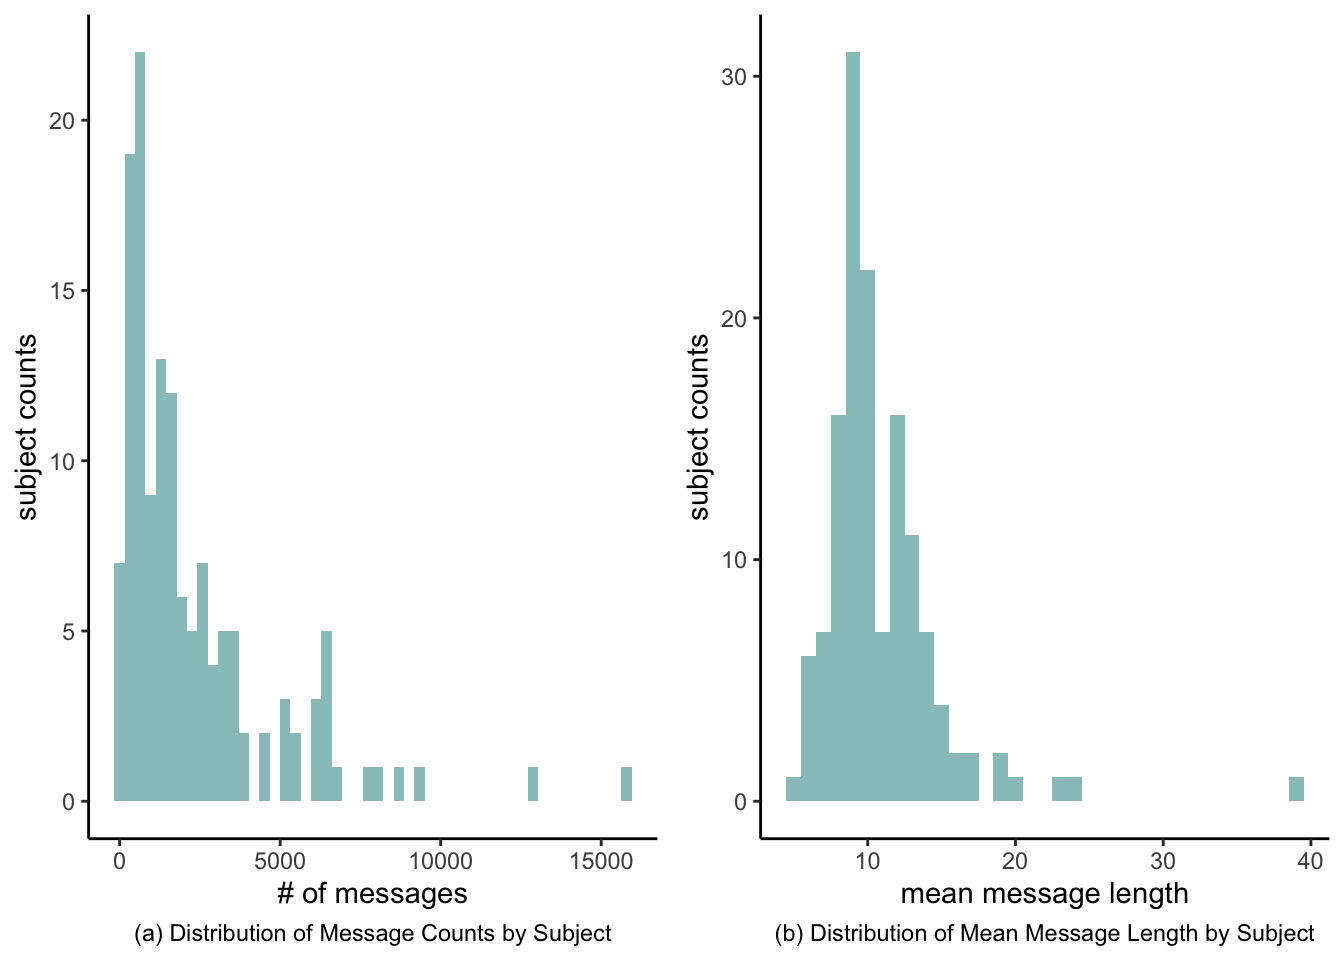
<figcaption>Figure 4: Sample Characteristics of Raw Messages</figcaption>
</figure>

On average, each lapse label has 79.21 messages (sd = 112.13, median = 40.00, range = 1 - 1414) during the 3-day prediction window. 11.92% of labels have no associated messages in the previous 3 days. Each participant has an averaged 79.48 messages as predictors per label (sd = 87.12, median = 50.12, range = 2.97 - 529.45). On average, each participant’s data missingness is 12.28% (sd = 19.42%, median = 1.14%, range = 0.00% - 77.27%).

``` python
ggpubr::ggarrange(
  ggpubr::ggarrange(NULL, plt1_3day, NULL, ncol = 3, widths = c(1, 1, 1)), 
  ggpubr::ggarrange(plt2_3day, plt3_3day, ncol = 2, nrow = 1),  
  nrow = 2, ncol = 1, heights = c(1, 1) 
)
```

    `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
    `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
    `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

<figure id="fig-3day">
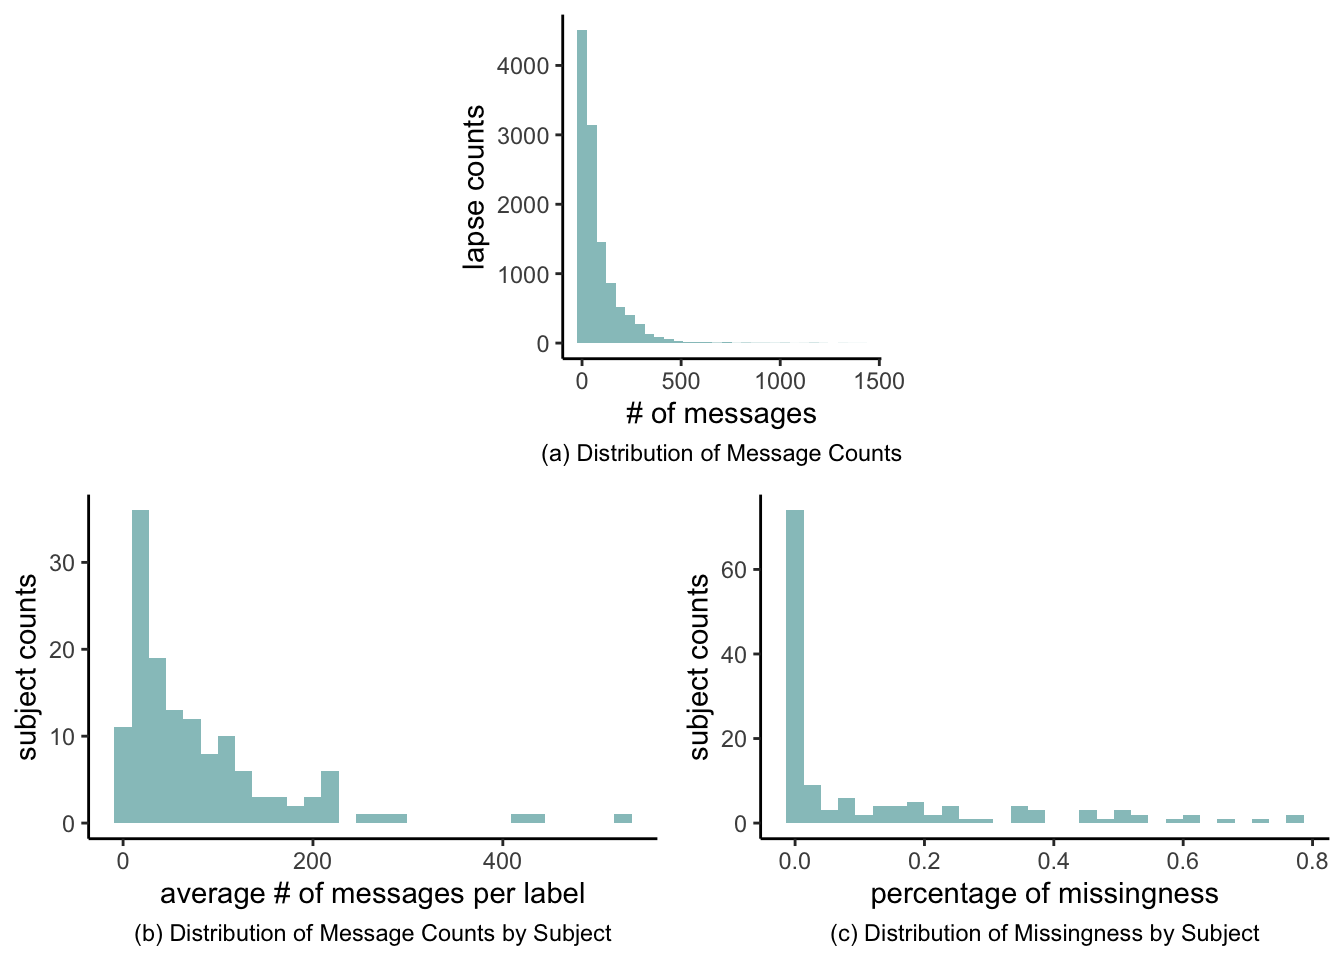
<figcaption>Figure 5: Sample Characteristics in the 3-Day Prediction Window</figcaption>
</figure>

On average, each lapse label has 180.42 messages (sd = 241.30, median = 96.00, range = 1 - 2866) during the 1-week prediction window. 7.83% of labels have no associated messages in the previous week. Each participant has an averaged 181.23 messages as predictors per label (sd = 199.32, median = 113.47, range = 6.75 - 1200.76). On average, each participant’s data missingness is 8.14% (sd = 16.23%, median = 0.00%, range = 0.00% - 72.73%).

``` python
ggpubr::ggarrange(
  ggpubr::ggarrange(NULL, plt1_1week, NULL, ncol = 3, widths = c(1, 1, 1)), 
  ggpubr::ggarrange(plt2_1week, plt3_1week, ncol = 2, nrow = 1),  
  nrow = 2, ncol = 1, heights = c(1, 1) 
)
```

    `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
    `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
    `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

<figure id="fig-1week">
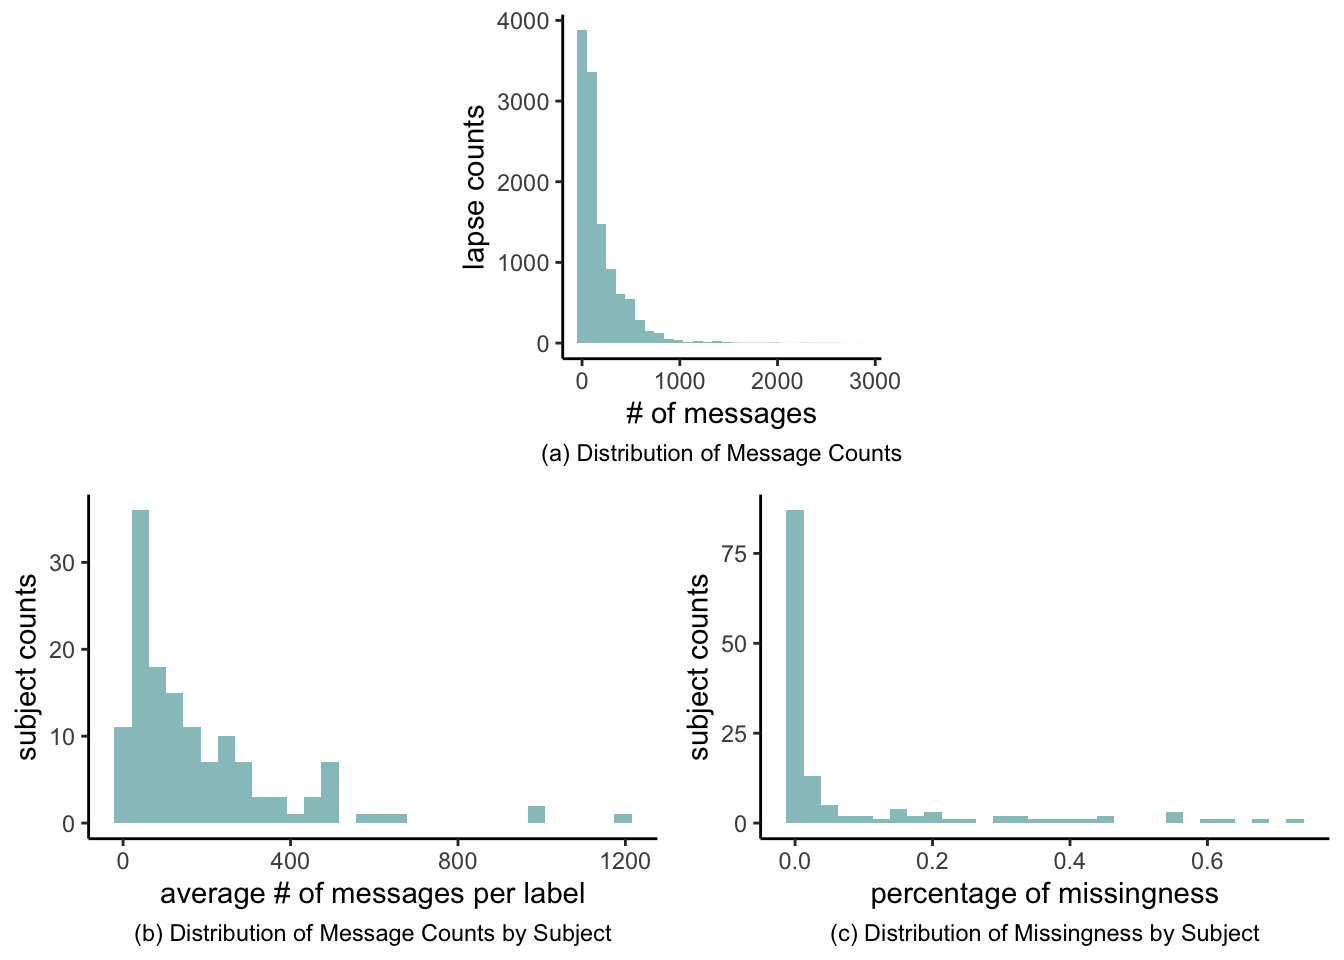
<figcaption>Figure 6: Sample Characteristics in the 1-Week Prediction Window</figcaption>
</figure>

## LIWC Features

We obtained LIWC scores from 117 linguistic categories. These categories include total word count, number of words per sentence, the four summary categories (analytic, clout, authentic, and tone), and other linguistic categories such as social and pronouns. Notably, LIWC-22 now incorporates a *health* dimension that includes phrases related to illness, wellness, mental health (diagnoses or behaviors), and substances. For each unit of analysis, we had 468 engineered features after normalization and aggregation (see *Section Feature Engineering*).

When our unit of analysis was on individual messages (see <a href="#tbl-panel" class="quarto-xref">Table 3</a> and <a href="#fig-liwc_ind" class="quarto-xref">Figure 7</a>), the median of all median LIWC feature scores excluding the six unnormalized categories within each 3-day prediction window ranged from 0.00 to 2.45 (median = 0.00, sd = 0.34). The median of all median LIWC feature scores excluding the six unnormalized categories within each 1-week prediction window ranged from 0.00 to 2.45 (median = 0.00, sd = 0.35). The max of all median LIWC feature scores excluding the six unnormalized categories within each 3-day prediction window ranged from 0.00 to 11.58 (median = 0.80, sd = 1.60). The max of all median LIWC feature scores excluding the six unnormalized categories within each 1-week prediction window ranged from 0.00 to 8.89 (median = 0.63, sd = 1.25).

The median of all 95% percentile LIWC feature scores excluding the six unnormalized categories within each 3-day prediction window ranged from 0.00 to 4.74 (median = 0.30, sd = 0.70). The median of all 95% percentile LIWC feature scores excluding the six unnormalized categories within each 1-week prediction window ranged from 0.00 to 4.89 (median = 0.34, sd = 0.72). The max of all 95% percentile LIWC feature scores excluding the six unnormalized categories within each 3-day prediction window ranged from 0.36 to 17.51 (median = 1.15, sd = 2.40). The max of all 95% percentile LIWC feature scores excluding the six unnormalized categories within each 1-week prediction window ranged from 0.35 to 18.42 (median = 1.00, sd = 2.47).

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<tbody>
<tr class="odd">
<td style="text-align: center;"><div width="100.0%" data-layout-align="center">
<div>
<table>
<colgroup>
<col style="width: 20%" />
<col style="width: 20%" />
<col style="width: 20%" />
<col style="width: 20%" />
<col style="width: 20%" />
</colgroup>
<thead>
<tr class="header">
<th></th>
<th>SD</th>
<th>Median</th>
<th>Min</th>
<th>Max</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td>wc_median</td>
<td>5.43</td>
<td>7.00</td>
<td>1.00</td>
<td>142.00</td>
</tr>
<tr class="even">
<td>wc_q_95</td>
<td>20.31</td>
<td>26.40</td>
<td>1.00</td>
<td>369.05</td>
</tr>
<tr class="odd">
<td>wps_median</td>
<td>2.45</td>
<td>5.00</td>
<td>0.00</td>
<td>78.00</td>
</tr>
<tr class="even">
<td>wps_q_95</td>
<td>5.96</td>
<td>14.75</td>
<td>0.00</td>
<td>78.00</td>
</tr>
<tr class="odd">
<td>analytic_median</td>
<td>17.11</td>
<td>10.19</td>
<td>1.00</td>
<td>99.00</td>
</tr>
<tr class="even">
<td>analytic_q_95</td>
<td>19.24</td>
<td>97.20</td>
<td>1.00</td>
<td>99.00</td>
</tr>
<tr class="odd">
<td>clout_median</td>
<td>32.72</td>
<td>40.06</td>
<td>1.00</td>
<td>99.00</td>
</tr>
<tr class="even">
<td>clout_q_95</td>
<td>12.98</td>
<td>99.00</td>
<td>1.00</td>
<td>99.00</td>
</tr>
<tr class="odd">
<td>authentic_median</td>
<td>19.60</td>
<td>89.39</td>
<td>1.00</td>
<td>99.00</td>
</tr>
<tr class="even">
<td>authentic_q_95</td>
<td>10.77</td>
<td>99.00</td>
<td>1.00</td>
<td>99.00</td>
</tr>
<tr class="odd">
<td>tone_median</td>
<td>17.84</td>
<td>99.00</td>
<td>1.00</td>
<td>99.00</td>
</tr>
<tr class="even">
<td>tone_q_95</td>
<td>9.85</td>
<td>99.00</td>
<td>1.00</td>
<td>99.00</td>
</tr>
</tbody>
</table>
<p>(a) 3-Day Prediction Window</p>
</div>
</div></td>
</tr>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<tbody>
<tr class="odd">
<td style="text-align: center;"><div width="100.0%" data-layout-align="center">
<div>
<table>
<colgroup>
<col style="width: 20%" />
<col style="width: 20%" />
<col style="width: 20%" />
<col style="width: 20%" />
<col style="width: 20%" />
</colgroup>
<thead>
<tr class="header">
<th></th>
<th>SD</th>
<th>Median</th>
<th>Min</th>
<th>Max</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td>wc_median</td>
<td>4.00</td>
<td>7.00</td>
<td>1.00</td>
<td>81.00</td>
</tr>
<tr class="even">
<td>wc_q_95</td>
<td>17.84</td>
<td>28.00</td>
<td>1.00</td>
<td>404.00</td>
</tr>
<tr class="odd">
<td>wps_median</td>
<td>2.20</td>
<td>5.00</td>
<td>1.00</td>
<td>78.00</td>
</tr>
<tr class="even">
<td>wps_q_95</td>
<td>5.53</td>
<td>15.10</td>
<td>1.00</td>
<td>78.00</td>
</tr>
<tr class="odd">
<td>analytic_median</td>
<td>14.02</td>
<td>10.19</td>
<td>1.00</td>
<td>99.00</td>
</tr>
<tr class="even">
<td>analytic_q_95</td>
<td>14.85</td>
<td>98.59</td>
<td>1.00</td>
<td>99.00</td>
</tr>
<tr class="odd">
<td>clout_median</td>
<td>30.57</td>
<td>40.06</td>
<td>1.00</td>
<td>99.00</td>
</tr>
<tr class="even">
<td>clout_q_95</td>
<td>9.94</td>
<td>99.00</td>
<td>1.00</td>
<td>99.00</td>
</tr>
<tr class="odd">
<td>authentic_median</td>
<td>15.87</td>
<td>89.39</td>
<td>1.00</td>
<td>99.00</td>
</tr>
<tr class="even">
<td>authentic_q_95</td>
<td>7.36</td>
<td>99.00</td>
<td>1.00</td>
<td>99.00</td>
</tr>
<tr class="odd">
<td>tone_median</td>
<td>13.85</td>
<td>99.00</td>
<td>1.00</td>
<td>99.00</td>
</tr>
<tr class="even">
<td>tone_q_95</td>
<td>7.27</td>
<td>99.00</td>
<td>1.00</td>
<td>99.00</td>
</tr>
</tbody>
</table>
<p>(b) 1-Week Prediction Window</p>
</div>
</div></td>
</tr>
</tbody>
</table>

Table 3: Sample Characteristics of Engineered Feature Scores (Median and 95% Quantile Scores from Individual Messages) for the Six Unnormalized Categories Within Each Prediction Window

``` python
plot_grid(plt1_ind +
            draw_label("(a) liwc score distribution in 3-day prediction window",
                       size = 10, x = 0.5, y = -0.03, hjust = 0.5, vjust = 0) +
            theme(plot.margin = margin(t = 0, r = 0, b = 15, l = 0)),
          plt2_ind + 
            draw_label("(b) liwc score distribution in 1-week prediction window",
                       x = 0.5, y = -0.03, hjust = 0.5, vjust = 0, size = 10) +
            theme(plot.margin = margin(t = 0, r = 0, b = 15, l = 0)),
          ncol = 1)
```

<figure id="fig-liwc_ind">
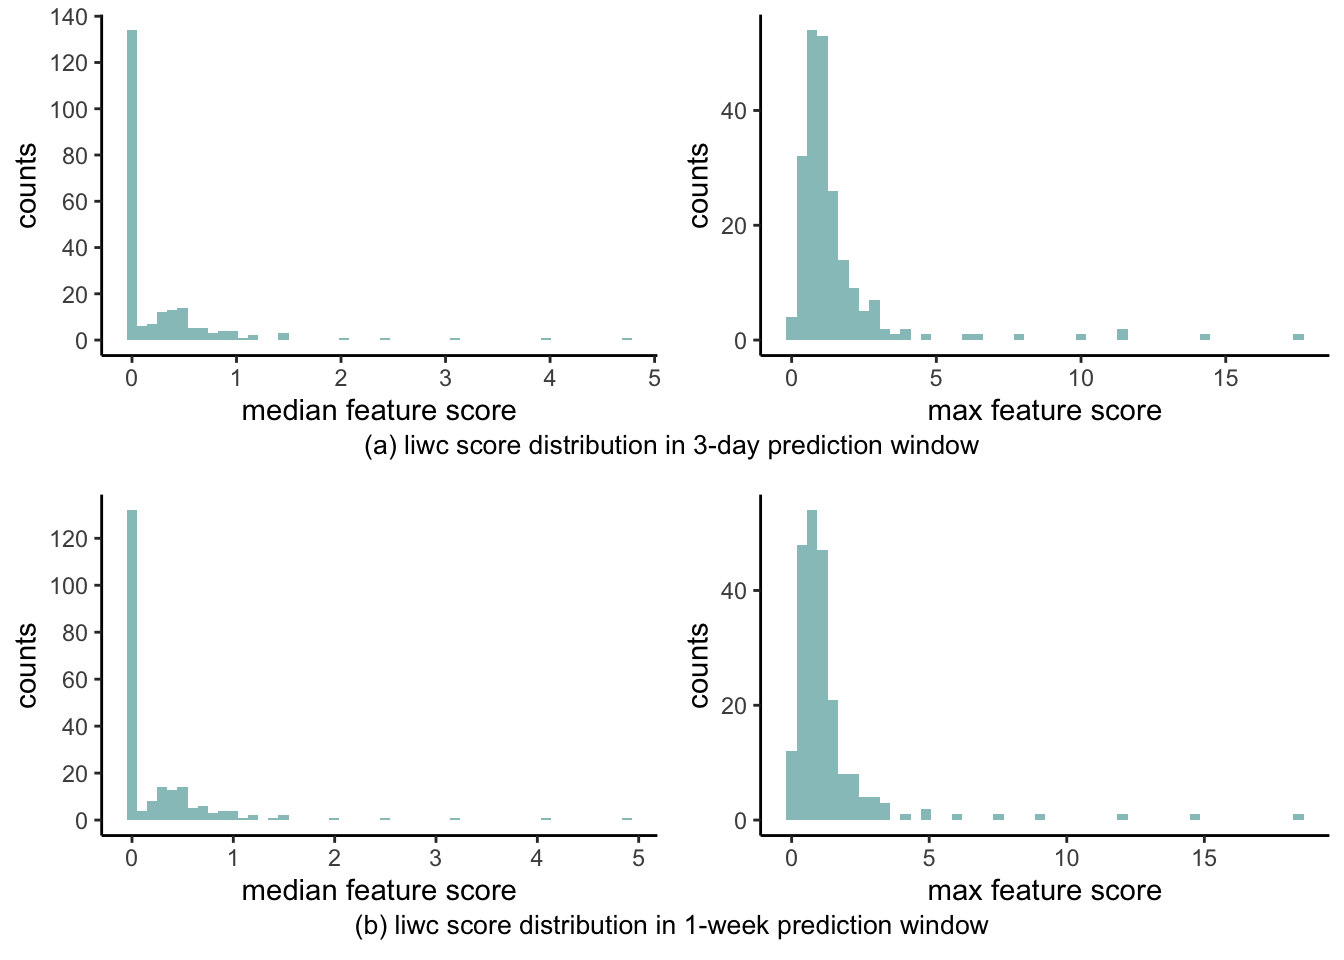
<figcaption>Figure 7: Distribution of Engineered Feature Scores (Median or 95% Percentile of Normalized LIWC Score From Individual Messages) Within Each Prediction Window</figcaption>
</figure>

When our unit of analysis was on concatenated messages (see <a href="#tbl-panel2" class="quarto-xref">Table 4</a>, <a href="#fig-liwc_cat_raw" class="quarto-xref">Figure 8</a> and <a href="#fig-liwc_cat_norm" class="quarto-xref">Figure 9</a>), the median of all raw feature scores within the 3-day prediction window ranged from 0.00 to 91.36 (median = 1.32, sd = 12.64). The median of all raw feature scores within the 1-week prediction window ranged from 0.00 to 91.30 (median = 1.36, sd = 12.63). The max of all raw feature scores within the 3-day prediction window ranged from 3.85 to 166.67 (median = 33.33, sd = 37.64). The max of all raw feature scores within the 1-week prediction window ranged from 1.82 to 166.67 (median = 27.27, sd = 35.21).

The median of all normalized feature scores within the 3-day prediction window ranged from 0.00 to 20.63 (median = 0.32, sd = 2.85). The median of all normalized feature scores within the 1-week prediction window ranged from 0.00 to 30.69 (median = 0.47, sd = 4.25). The max of all normalized feature scores within the 3-day prediction window ranged from 0.37 to 106.55 (median = 2.95, sd = 15.11). The max of all normalized feature scores within the 1-week prediction window ranged from 0.29 to 143.30 (median = 3.16, sd = 20.31).

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<tbody>
<tr class="odd">
<td style="text-align: center;"><div width="50.0%" data-layout-align="center">
<div>
<table>
<colgroup>
<col style="width: 20%" />
<col style="width: 20%" />
<col style="width: 20%" />
<col style="width: 20%" />
<col style="width: 20%" />
</colgroup>
<thead>
<tr class="header">
<th></th>
<th>SD</th>
<th>Median</th>
<th>Min</th>
<th>Max</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td>wc</td>
<td>1175.22</td>
<td>512.00</td>
<td>1</td>
<td>13211</td>
</tr>
<tr class="even">
<td>wps</td>
<td>9.75</td>
<td>10.76</td>
<td>0</td>
<td>295</td>
</tr>
<tr class="odd">
<td>analytic</td>
<td>16.96</td>
<td>19.05</td>
<td>1</td>
<td>99</td>
</tr>
<tr class="even">
<td>clout</td>
<td>25.37</td>
<td>50.20</td>
<td>1</td>
<td>99</td>
</tr>
<tr class="odd">
<td>authentic</td>
<td>22.34</td>
<td>77.13</td>
<td>1</td>
<td>99</td>
</tr>
<tr class="even">
<td>tone</td>
<td>23.28</td>
<td>82.19</td>
<td>1</td>
<td>99</td>
</tr>
</tbody>
</table>
<p>(a) 3-Day Prediction Window</p>
</div>
</div></td>
<td style="text-align: center;"><div width="50.0%" data-layout-align="center">
<div>
<table>
<colgroup>
<col style="width: 20%" />
<col style="width: 20%" />
<col style="width: 20%" />
<col style="width: 20%" />
<col style="width: 20%" />
</colgroup>
<thead>
<tr class="header">
<th></th>
<th>SD</th>
<th>Median</th>
<th>Min</th>
<th>Max</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td>wc</td>
<td>2484.84</td>
<td>1124.00</td>
<td>1</td>
<td>23702</td>
</tr>
<tr class="even">
<td>wps</td>
<td>8.73</td>
<td>10.91</td>
<td>1</td>
<td>241</td>
</tr>
<tr class="odd">
<td>analytic</td>
<td>14.30</td>
<td>19.17</td>
<td>1</td>
<td>99</td>
</tr>
<tr class="even">
<td>clout</td>
<td>22.54</td>
<td>50.15</td>
<td>1</td>
<td>99</td>
</tr>
<tr class="odd">
<td>authentic</td>
<td>19.04</td>
<td>77.10</td>
<td>1</td>
<td>99</td>
</tr>
<tr class="even">
<td>tone</td>
<td>20.76</td>
<td>82.04</td>
<td>1</td>
<td>99</td>
</tr>
</tbody>
</table>
<p>(b) 1-Week Prediction Window</p>
</div>
</div></td>
</tr>
</tbody>
</table>

Table 4: Sample Characteristics of Raw LIWC Scores on Concatenated Messages Across the Six Linguistic Categories Within Each Prediction Window

``` python
plot_grid(plt1_cat +
            draw_label("(a) feature score distribution in 3-day prediction window",
                       size = 10, x = 0.5, y = -0.03, hjust = 0.5, vjust = 0) +
            theme(plot.margin = margin(t = 0, r = 0, b = 15, l = 0)),
          plt2_cat + 
            draw_label("(b) feature score distribution in 1-week prediction window",
                       x = 0.5, y = -0.03, hjust = 0.5, vjust = 0, size = 10) +
            theme(plot.margin = margin(t = 0, r = 0, b = 15, l = 0)),
          ncol = 1)
```

<figure id="fig-liwc_cat_raw">
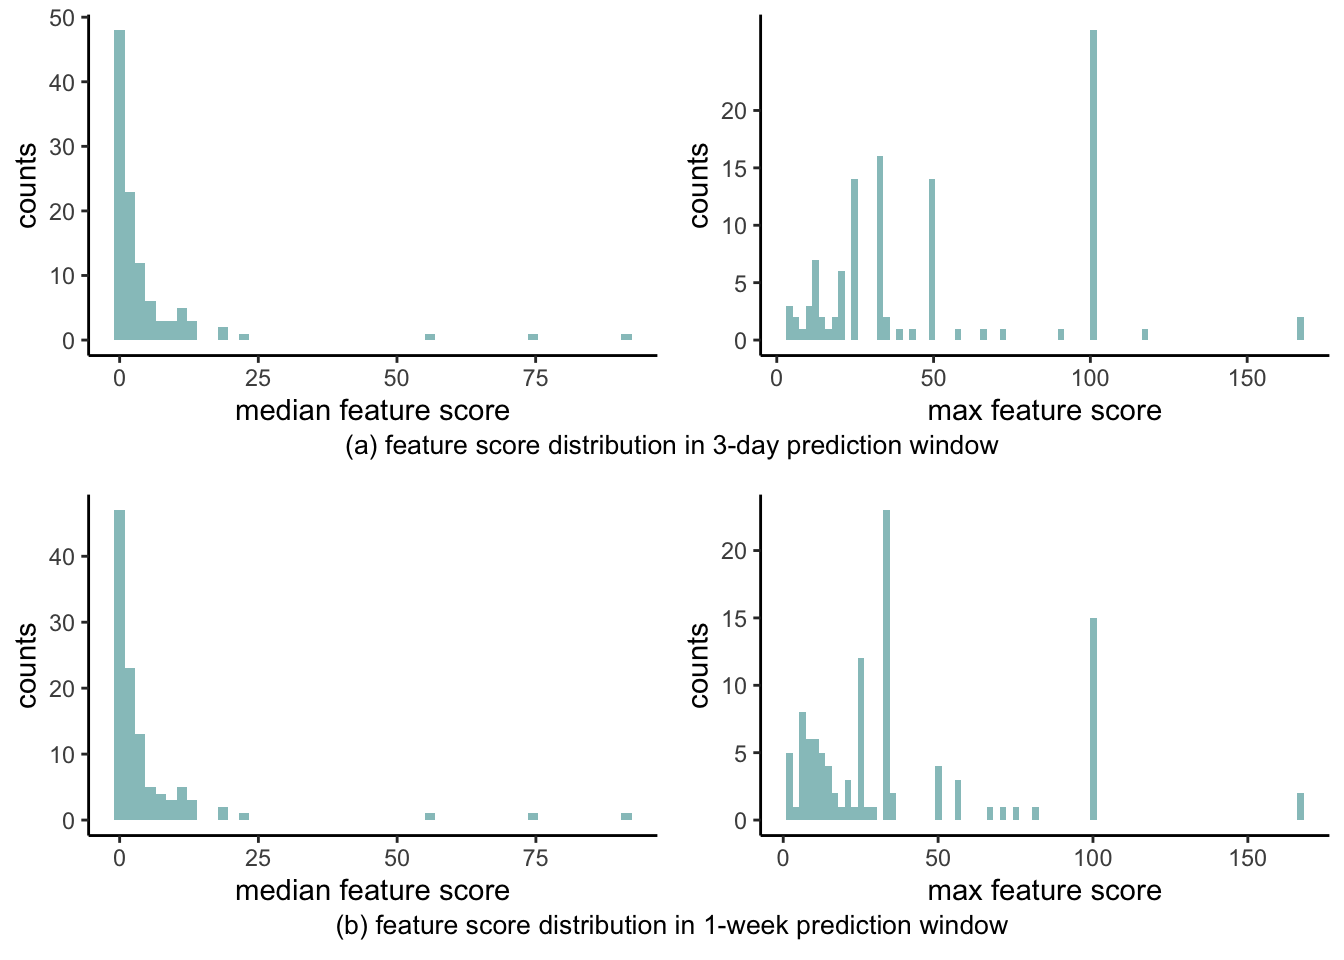
<figcaption>Figure 8: Distribution of Raw LIWC Feature Scores From Concatenated Messages Within Each Prediction Window</figcaption>
</figure>

``` python
plot_grid(plt3_cat +
            draw_label("(a) feature score distribution in 3-day prediction window",
                       size = 10, x = 0.5, y = -0.03, hjust = 0.5, vjust = 0) +
            theme(plot.margin = margin(t = 0, r = 0, b = 15, l = 0)),
          plt4_cat + 
            draw_label("(b) feature score distribution in 1-week prediction window",
                       x = 0.5, y = -0.03, hjust = 0.5, vjust = 0, size = 10) +
            theme(plot.margin = margin(t = 0, r = 0, b = 15, l = 0)),
          ncol = 1)
```

<figure id="fig-liwc_cat_norm">
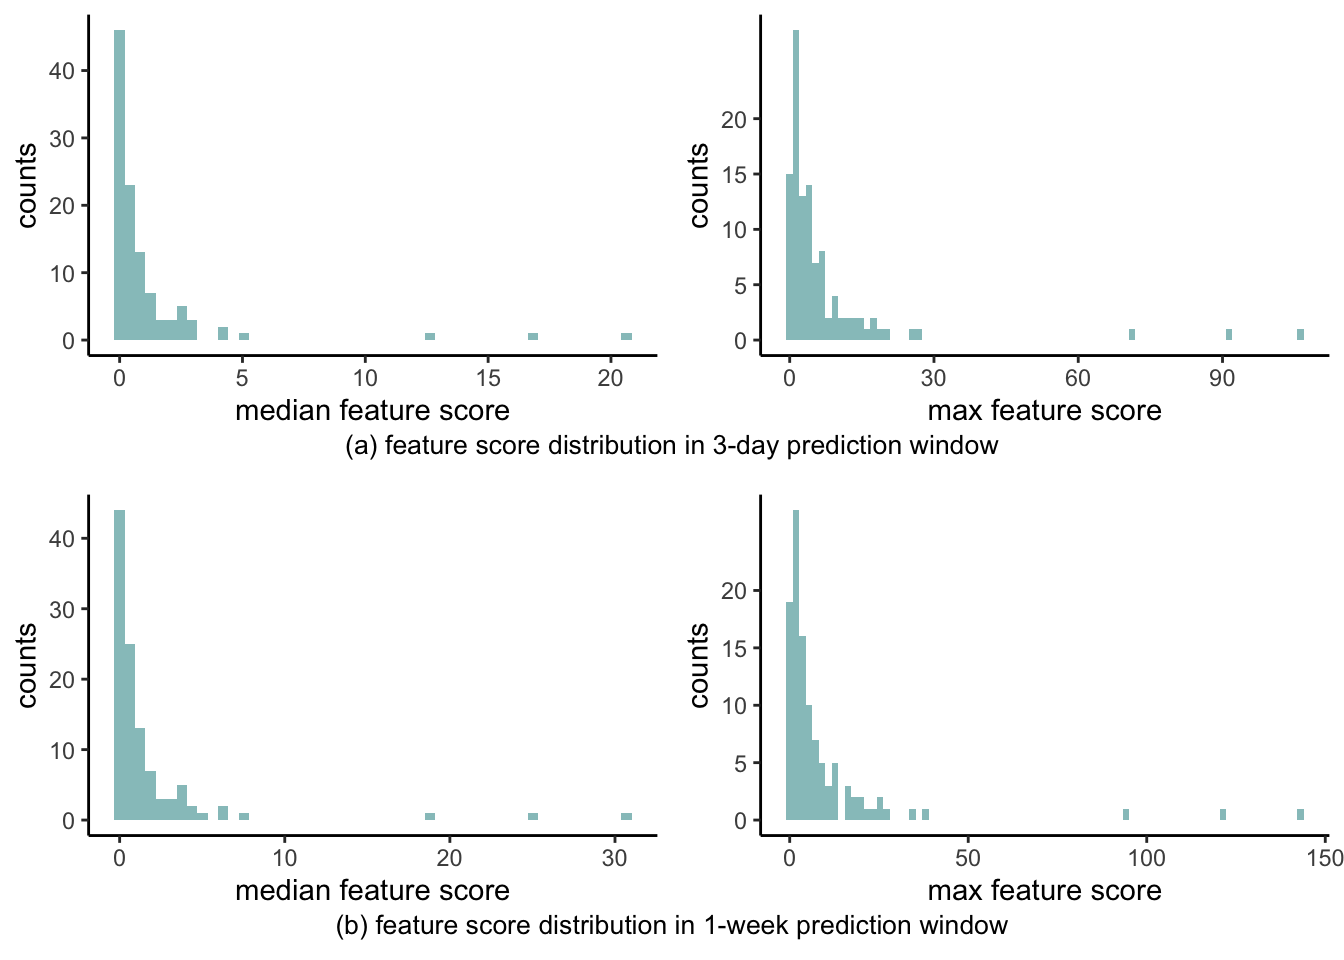
<figcaption>Figure 9: Distribution of Normalized LIWC Feature Scores From Concatenated Messages Within Each Prediction Window</figcaption>
</figure>

## Best Model Evaluation

The best model configuration was the one that leveraged raw LWIC scores from concatenated messages within both the 3-day and 1-week prediction window, and an upsampling technique with a ratio of 1:1. We applied the best configuration on the raw dataset and obtained an auROC score of 0.53 (see <a href="#fig-auroc" class="quarto-xref">Figure 10</a> for the ROC curve). We further aggregated predictions by folds, and the median score of all median auROCs across the 300 inner folds was 0.53 (sd = 0.09, range = 0.28 - 0.80; see <a href="#fig-auroc_hist" class="quarto-xref">Figure 11</a>). The median posterior distribution of the auROCs was 0.53 (95% CI = \[0.52, 0.54\]; see <a href="#fig-auroc_posterior" class="quarto-xref">Figure 12</a>). The probability of the posterior auROC larger than .5 was 1.00. We concluded that our model was better than chance performance.

``` python
probs |> 
  roc_curve(prob_raw, truth = label) |> 
  mutate(tp = round(sensitivity, 4),
         fp = round(1 - specificity, 4)) |>
  group_by(tp, fp) |> 
  summarise(.threshold = mean(.threshold)) |> 
  ggplot(aes(x = fp, y = tp, color = .threshold)) +
  geom_path(linewidth = 1) +
  geom_abline(lty = 3) +
  coord_fixed(xlim = c(0, 1), ylim = c(0, 1)) +
  labs(x = "False Positive Rate",
       y = "True Positive Rate") +
  scale_x_continuous(breaks = seq(0,1,.25)) +
  scale_color_gradient(low="blue", high = "red")
```

    `summarise()` has grouped output by 'tp'. You can override using the `.groups`
    argument.

<figure id="fig-auroc">
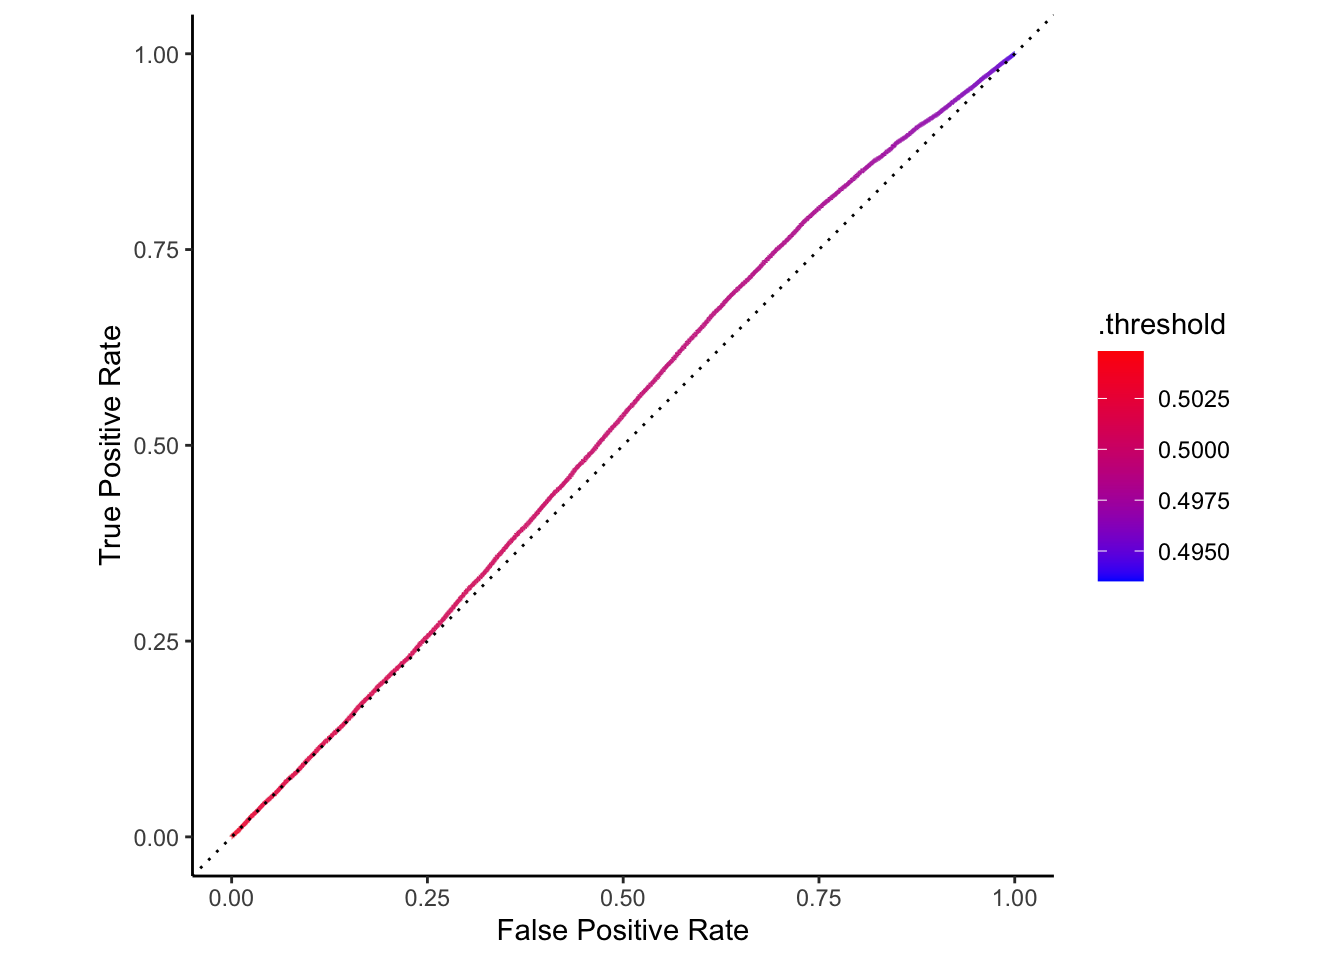
<figcaption>Figure 10: ROC Curve for the Best Model Configuration</figcaption>
</figure>

``` python
aurocs |> 
  ggplot(aes(x = auroc)) +
  geom_histogram(fill = "#97C4C5") +
  geom_vline(xintercept = median(aurocs$auroc), linetype = "dashed", color = "red")
```

    `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

<figure id="fig-auroc_hist">
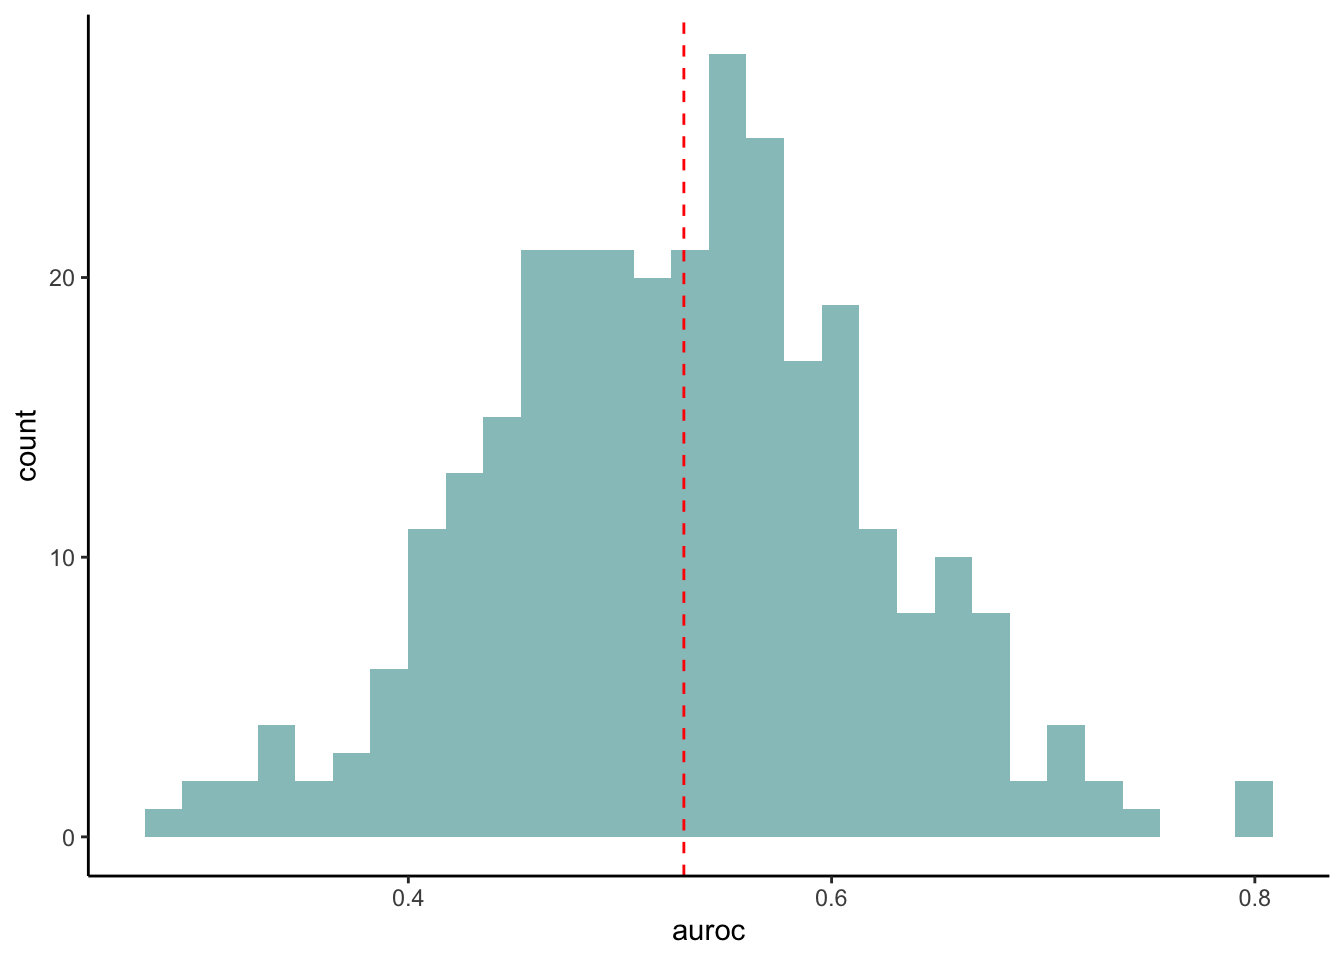
<figcaption>Figure 11: Distribution of auROCs Across 300 Inner Folds</figcaption>
</figure>

``` python
pp_tidy <- pp |> 
  tidy(seed = 123)

ci <- pp_tidy |> 
  summary() |> 
  mutate(y = 30)

# vertical line for the median
pp_tidy |> 
  ggplot() + 
  geom_density(aes(x = posterior), color = c("#80B1D3"), 
               fill = c("#B3CFE8"), linewidth = .8, alpha = .6) +
  geom_errorbar(data = ci, aes(y = y, xmin = lower, xmax = upper), 
                linewidth = .6, width = 2, color = c("#4292C6")) +
  geom_vline(xintercept = median(pp_tidy$posterior), 
             linetype = "dashed", color = "red") +
  geom_vline(xintercept = .5, 
             linetype = "dotdash", color = "darkgray") +
  ylab("Posterior Probability Density") +
  xlab("Area Under ROC Curve") +
  xlim(.5, 1)
```

<figure id="fig-auroc_posterior">
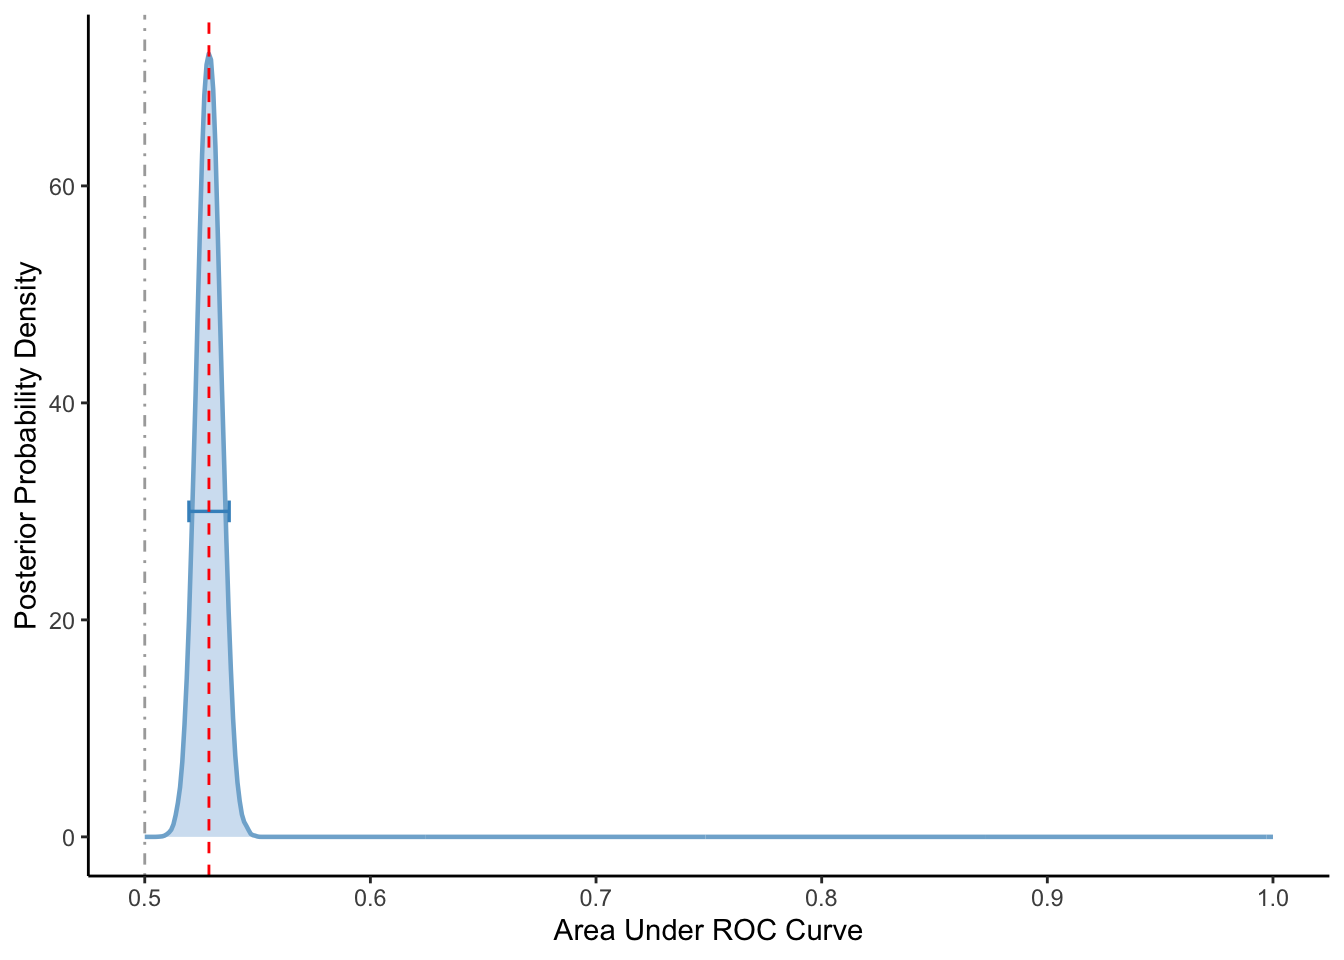
<figcaption>Figure 12: Posterior Distribution of auROC Scores</figcaption>
</figure>

## Model Fairness

73 (53%) participants are females, 17 (12%) are non-White minorities, 39 (28%) earned less than half of the median income in Madison in Year 2017, and 13 (9%) aged 55 or older (see <a href="#fig-demographics" class="quarto-xref">Figure 13</a>). Our model performed consistently worse in unprivileged group vs. privileged group across all four demographic categories (see <a href="#fig-fairness" class="quarto-xref">Figure 14</a> and <a href="#tbl-fairness" class="quarto-xref">Table 5</a>). The median of posterior distribution of model performance difference was 0.03 (95%CI = \[0.01, 0.06\]) for White people compared to People of Color. The probability of the performance for the White people higher than for People of Color was 0.99. The posterior distribution of performance differences also indicated that the model performed better in males than in females (median = 0.02, 95%CI = \[0.01, 0.04\], probability = 1.00), in people younger than 55 than people older than 55 (median = 0.04, 95%CI = \[0.01, 0.07\], probability = 1.00), and in people that have higher income than in those who have lower income (median = 0.02, 95%CI = \[0.00, 0.04\], probability = 0.99). We concluded that the model performed significantly worse in unprivileged groups.

``` python
output |> 
  mutate(
    subgroup = case_when(
      subgroup == "female" ~ "unprivileged",
      subgroup == "male" ~ "privileged",
      subgroup == "white" ~ "privileged",
      subgroup == "non_white" ~ "unprivileged",
      subgroup == "above_poverty" ~ "privileged",
      subgroup == "below_poverty" ~ "unprivileged",
      subgroup == "younger" ~ "privileged",
      subgroup == "older" ~ "unprivileged"
    ),
    demographics = case_when(
      demographics == "sex" ~ "Sex",
      demographics == "race" ~ "Race",
      demographics == "income" ~ "Income",
      demographics == "age" ~ "Age"
    )
  ) |> 
 ggplot(aes(x = "", y = N, fill = subgroup)) + 
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0) +
  scale_fill_manual(values = c("privileged" = "#B5D66E",
                               "unprivileged" = "#F28072")) +
  geom_text(aes(label = c(
    "Male",
    "Female",
    "White",
    "Person of Color",
    "Above Poverty",
    "Below Poverty",
    "Younger",
    "Older (>55)"
  )), position = position_stack(vjust = 0.5)) +
  theme_void() +
  theme(legend.title=element_blank(), legend.position = "bottom") +
  facet_wrap(~factor(demographics, levels = c("Race", "Sex", "Income", "Age"))) +
  theme(strip.text.x = element_text(size = 16, face="bold")) 
```

<figure id="fig-demographics">
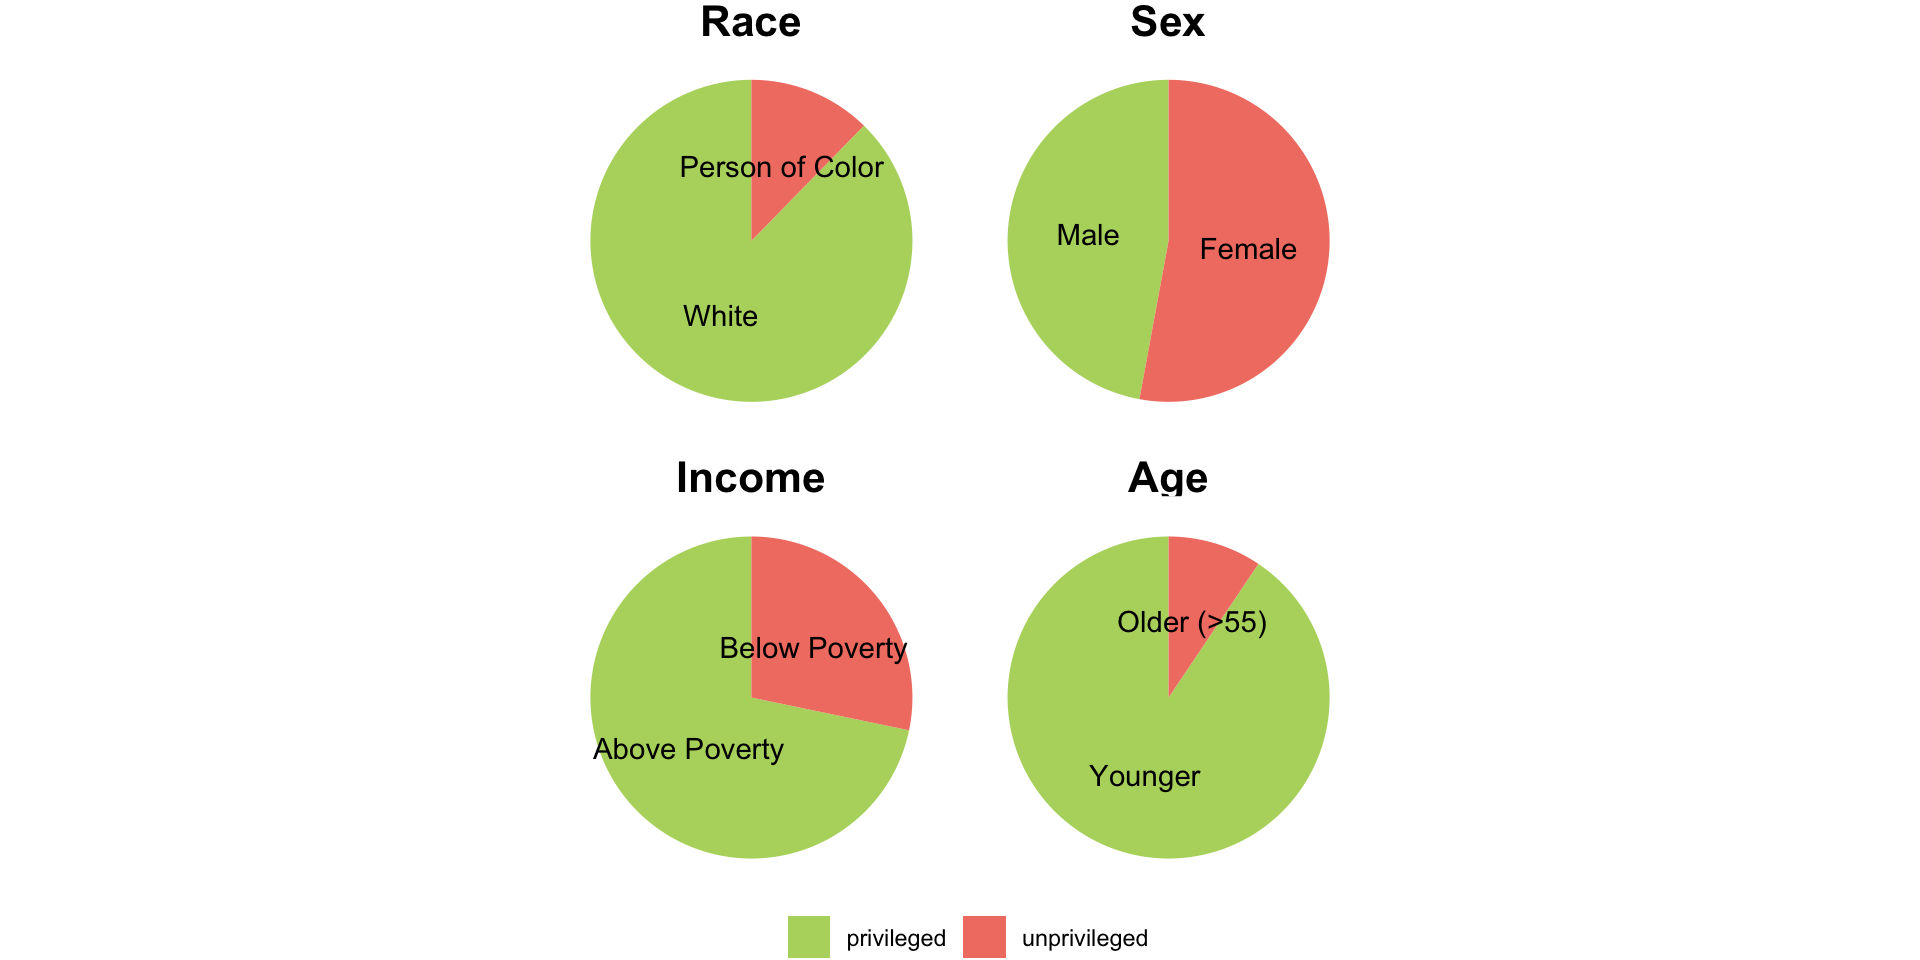
<figcaption>Figure 13: Demographic Distribution</figcaption>
</figure>

``` python
ggpubr::ggarrange(
  bayes_output(pp_race) |> 
    ggplot(aes(y = factor(model, levels = c("non_white", "white")), 
               x = median, color = model)) + 
    geom_point() +
    geom_errorbar(aes(xmin = lower, xmax = upper), width = .2) +
    scale_color_manual(values = c("#F28072", "#B5D66E")) +
    labs(x = "auROC", y = element_blank(), title = "Race") +
    scale_x_continuous(limits = c(0.46, 0.56), 
                       breaks = seq(0.46, 0.58, by = 0.02)) +
    theme(legend.position = "none"),
  bayes_output(pp_sex) |> 
    ggplot(aes(y = factor(model, levels = c("female", "male")), 
               x = median, color = model)) + 
    geom_point() +
    geom_errorbar(aes(xmin = lower, xmax = upper), width = .2) +
    scale_color_manual(values = c("#F28072", "#B5D66E")) +
    labs(x = "auROC", y = element_blank(), title = "Sex") +
    scale_x_continuous(limits = c(0.46, 0.56), 
                       breaks = seq(0.46, 0.58, by = 0.02)) +
    theme(legend.position = "none"),
  bayes_output(pp_age) |> 
    ggplot(aes(y = factor(model, levels = c("older", "younger")), 
               x = median, color = model)) + 
    geom_point() +
    geom_errorbar(aes(xmin = lower, xmax = upper), width = .2) +
    scale_color_manual(values = c("#F28072", "#B5D66E")) +
    labs(x = "auROC", y = element_blank(), title = "Age") +
    scale_x_continuous(limits = c(0.46, 0.56), 
                       breaks = seq(0.46, 0.58, by = 0.02)) +
    theme(legend.position = "none"),
  bayes_output(pp_income) |> 
    ggplot(aes(y = factor(model, levels = c("below_poverty", "above_poverty")), 
               x = median, color = model)) + 
    geom_point() +
    geom_errorbar(aes(xmin = lower, xmax = upper), width = .2) +
    scale_color_manual(values = c("#B5D66E", "#F28072")) +
    labs(x = "auROC", y = element_blank(), title = "Income") +
    scale_x_continuous(limits = c(0.46, 0.56), 
                       breaks = seq(0.46, 0.58, by = 0.02)) +
    theme(legend.position = "none")
)
```

<figure id="fig-fairness">
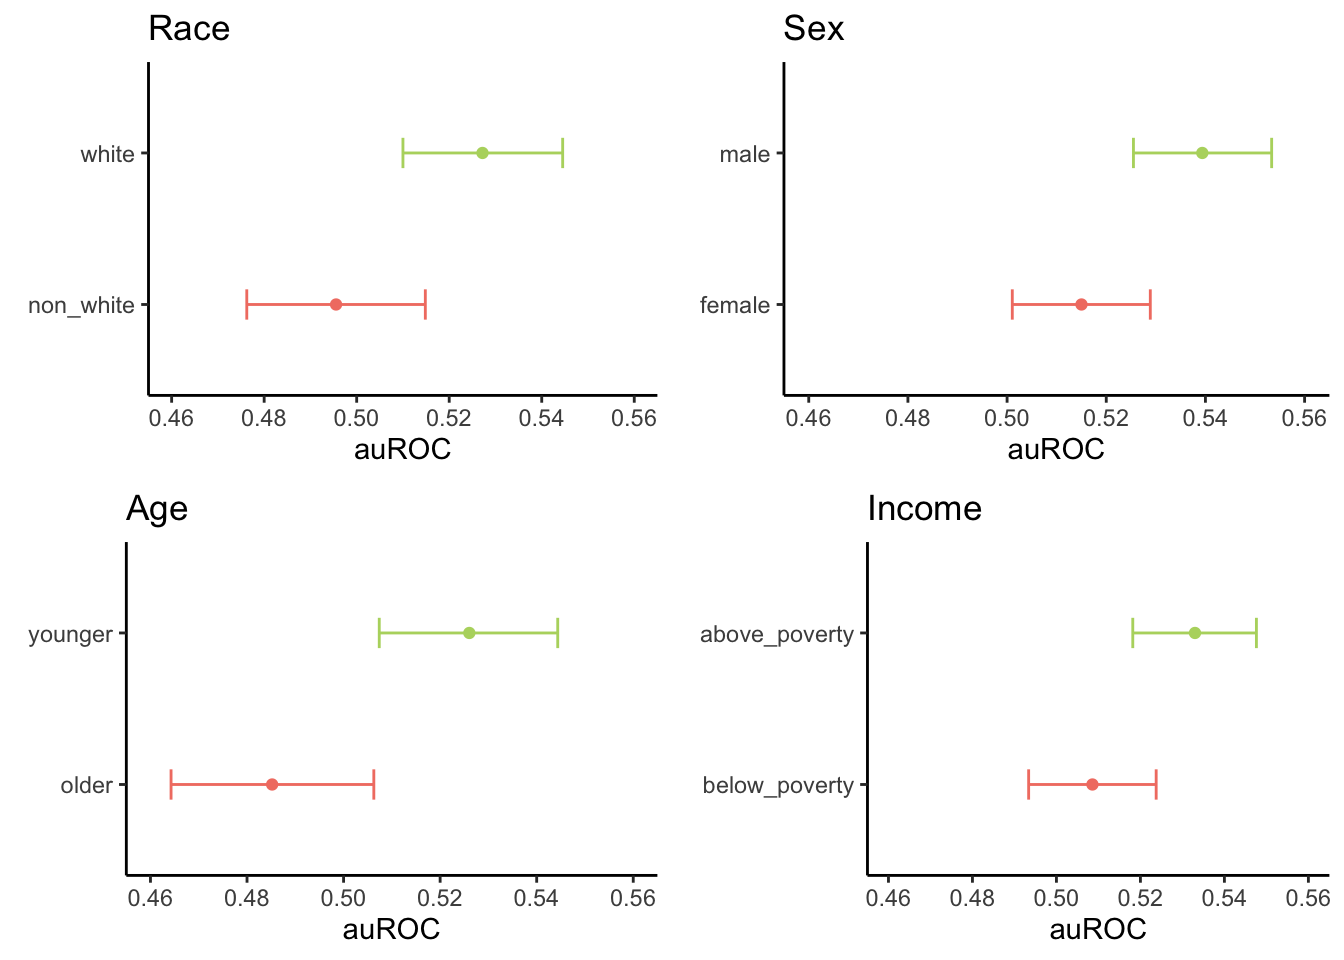
<figcaption>Figure 14: auROC posterior distribution across different privileged vs. unprivileged groups</figcaption>
</figure>

|                                 | median | lower | upper | probability |
|---------------------------------|--------|-------|-------|-------------|
| white vs. non_white             | 0.03   | 0.01  | 0.06  | 0.99        |
| male vs. female                 | 0.02   | 0.01  | 0.04  | 1.00        |
| younger vs. older               | 0.04   | 0.01  | 0.07  | 1.00        |
| above_poverty vs. below_poverty | 0.02   | 0.00  | 0.04  | 0.99        |

Table 5: Model Performance Difference across different demographic subgroups

## Model Interpretation

The top 30 LIWC categories with the highest global shapley values were displayed in <a href="#fig-shaps" class="quarto-xref">Figure 15</a>. Three categories appeared to be the most robust in contributing to model output – social processes (e.g., you, we, he, she), social behavior (e.g., said, love, say, care), and second person pronoun (e.g., you, your, yourself). The other less robust categories included total word count, clout (language of leadership), assent (e.g., yeah, yes, okay, ok), social referents (e.g., you, we, he, she), and prosocial behaviors (e.g., care, help, thank, please).

``` python
shaps |>
  head(30) |> 
  ggplot() +
  geom_bar(aes(x = group, y = mean_value), stat = "identity", fill = "#af1f21") +
  ylab("Mean |SHAP| value (in Log-Odds)") +
  xlab("") +
  coord_flip()
```

<figure id="fig-shaps">
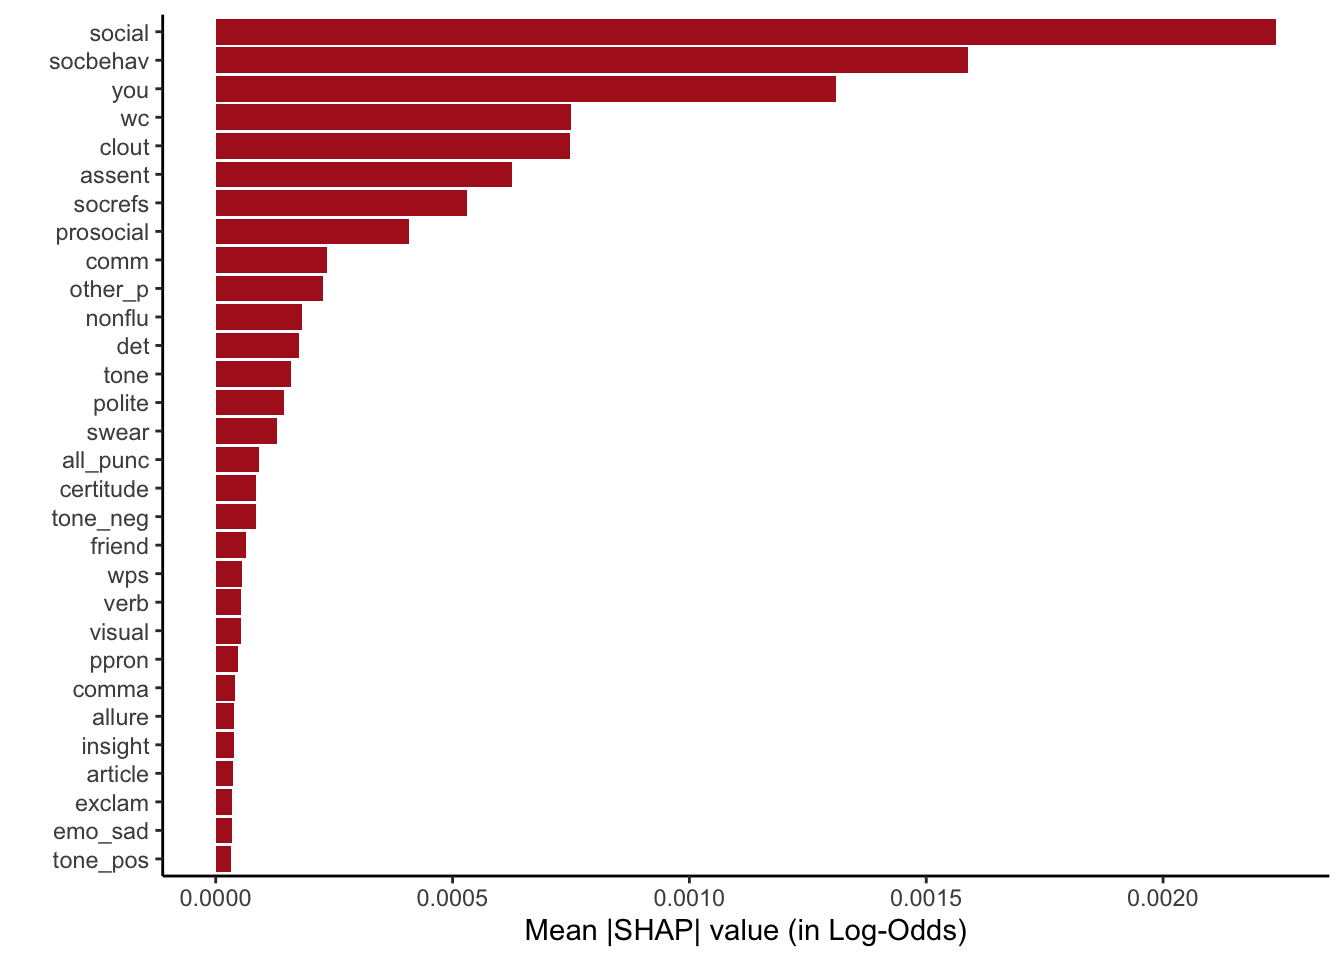
<figcaption>Figure 15: Shapley Value</figcaption>
</figure>

# Discussion

Overall, our best machine learning model configuration leveraging linguistic categories from SMS messages to predict a single episode of alcohol lapse achieved an auROC score of .53. Our model was able to extract signal from text messages. Nonetheless, the .03 increase beyond chance performance is not sufficient enough for any clinical use.

Our LIWC model was only planned to serve as a baseline model against which to later compare my sophisticated approaches following the FYP. Clearly, more robust features need to be engineered from SMS messages to achieve better prediction. <!--I think you want to pivot away from liwc pretty quickly.   How can you vary prediction window length furhter?  If you go any shorter than 3 day there is too much missing data.  Are you talking about longer? Not sure that makes sense either--> Our next plan is to explore other more sophisticated natural language processing (NLP) techniques to train our models. In addition to the current configurations varying in prediction window length, we might also incorporate configurations such as message types.

To improve model performance, we might consider subsetting messages based on their types. For instance, we can analyze incoming and outgoing messages individually. By distinguishing between the two, we might get a more refined understanding of communication dynamics. For example, incoming messages might indicate the level of social support one gets and outgoing messages might reflect their level of self-disclosure and willingness to seek help. In the current study, we have taken a different approach that combined the two message types together. Although it provides an overview of social interactions between participants and their contacts, it might overlook some nuanced distinctions underlying texts from those two message types. On the other hand, it is important to emphasize potential drawbacks to separate the two message types, especially given the limited number of messages (see *Section Sample Distribution*) associated with each label. It might lead to the problem of data sparsity which might even exacerbate model performance and decrease its generalizability. We might consider extended prediction window (e.g., 1-week window only) to aggregate more data.

We can further try a variety of other natural language processing (NLP) techniques for feature engineering including topic modeling, sentiment analysis, n-grams approach and word embeddings. Our next and second baseline model can be an n-grams approach. It represents bags-of-words occurrences inside a document. We can leverage term frequency, inverse document frequency and a combination of the two to mine word importance inside a document. As this method yields high-dimensional data, we might also consider combining it with dimension reduction approaches to do feature engineering. Other NLP methods we might try include topic modeling. It is an unsupervised machine learning methods to identify clusters of topics in a body of text. We can also try other Sentiment Analysis methods, beyond LIWC’s native affect and emotion categories which focus mostly on valence. For example, we might infer the emotional underpinning of texts in terms of basic emotion categories (e.g., anger, fear) from SMS messages. There are also other sentiment analysis approaches outside of LIWC that can handle modifier words and provide sentence level rather than word level analysis. We can also utilize word embeddings—vectors that represent relationships of words within a document in a lower-dimension.

Note that these feature engineering techniques differ in their interpretability. Word embeddings is empirically-driven and its features that are less interpretable. <!--n grams is pretty interpretable.  Depends some on what words predict but I wouldnt offer it up an an exmple of a non-interpretable approahc--> The interpretability of n-grams can depend on the presence of words that contain high global importance. Topic modeling, though data-driven, might yield topic clusters that are interpretable. Sentiment Analysis can yield features that are highly interpretable and might map on to current interventions. Importantly, our desired predictive model should not just be the one that has the highest predictive ability. We should also examine whether our model is interpretable enough to understand intervention-relevant risk factors. This helps us determine if our model can be clinically useful.

The minimal signal we detected in SMS messages might also reflect that text messages itself is not an effective data source to predict lapses. One potential reason might include that most people do not engage in enough SMS texting behaviors that produce meaningful patterns near the time of lapsing. Some people might also not use text messaging as their main source of communication. Some might have preferences for texting in other platforms (e.g., WhatsApp, Snapchat). The lack of sufficient data points curtails machine learning models’ ability to detect risk-relevant signals. To enhance model performance, we might need increased access to texts from other sources. Additionally, text messages might not convey information indicative of risk-relevant factors such as alcohol cravings ([Korlakunta et al., 2012-07/2012-12](#ref-korlakuntaReasonsRelapsePatients2012); [McKay, 1999](#ref-mckayStudiesFactorsRelapse1999a); [Wyant et al., 2024](#ref-wyantMachineLearningModels2024)). Communications in SMS messages might involve casual and monotonous interactions which lacks specificity to effectively predict lapses.

Alternatively, we can explore adoption of metadata from text messages and voice calls as predictive features. Those metadata include number of messages within a prediction window, contextual information related to the contact person, timing of messages or calls, etc. We can mine sudden changes to messaging or calling behaviors from those metadata that might signal enhanced lapse risks. For example, an increased number of late night outgoing messages might indicate a sudden mood change preceding a lapse. Note that we have already witnessed some success in our lab’s previous work (see Kendra’s FYP), with auROCs in mid to upper .60s.

Surprisingly, despite the low performance score, we still witnessed consistent unfairness in our algorithm for unprivileged demographic subgroups. One key factor that contributed to the model biases might be the disproportionate representation of subgroups such as racial minorities. To address this limitation, we might recruit a sample with a fair distribution of people with diverse backgrounds. Importantly, however, our model still systematically misrepresented other demographic subgroups even if they were well-represented in our training data. The other explanation might be that our features were inherently biased against subgroups. People from different demographic groups might display different language styles, and LIWC might be more attuned to those from the majority groups. As such, we should further try other natural language processing techniques that incorporate more fair features. For example, topic modeling does not rely on theories built upon past, White male-dominated research and might yield more fair features.

Results in this study indicate that text message might not be potentially valuable raw data source in predicting alcohol lapses in AUD patients. Although SMS messages offer the benefits of minimal burden on users, this advantage cannot compensate for their low prediction precision. EMA measures, despite their somewhat higher burden, are capable of capturing robust signals. GPS sensing, which is also not burdensome, can obtain some signals with little feature engineering (see Claire’s FYP). Note that both EMA and GPS sensing are easily accessible across platforms. Nonetheless, as SMS is not currently available in ios platform, we might have diminished further interest in this data source.

In sum, our machine learning algorithm had minimal increase in performance compared to random guess. The results call for further exploration of other feature engineering techniques to build models that have higher performance, are interpretable and have low algorithmic biases.

Abraham, A. J., Andrews, C. M., Harris, S. J., & Friedmann, P. D. (2020). Availability of Medications for the Treatment of Alcohol and Opioid Use Disorder in the USA. *Neurotherapeutics*, *17*(1), 55–69. <https://doi.org/10.1007/s13311-019-00814-4>

Andersson, H. W., Wenaas, M., & Nordfjærn, T. (2019). Relapse after inpatient substance use treatment: A prospective cohort study among users of illicit substances. *Addictive Behaviors*, *90*, 222–228. <https://doi.org/10.1016/j.addbeh.2018.11.008>

Beukenhorst, A. L., Burke, K. M., Scheier, Z., Miller, T. M., Paganoni, S., Keegan, M., Collins, E., Connaghan, K. P., Tay, A., Chan, J., Berry, J. D., & Onnela, J.-P. (2022). Using smartphones to reduce research burden in a neurodegenerative population and assessing participant adherence: A randomized clinical trial and two observational studies. *JMIR Mhealth and Uhealth*, *10*(2), e31877. <https://doi.org/10.2196/31877>

Brown, S. A., Vik, P. W., & Creamer, V. A. (1989). Characteristics of relapse following adolescent substance abuse treatment. *Addictive Behaviors*, *14*(3), 291–300. <https://doi.org/10.1016/0306-4603(89)90060-9>

Bucci, S., Berry, N., Morris, R., Berry, K., Haddock, G., Lewis, S., & Edge, D. (2019). “<span class="nocase">They Are Not Hard-to-Reach Clients</span>. <span class="nocase">We Have Just Got Hard-to-Reach Services</span>.” Staff Views of Digital Health Tools in Specialist Mental Health Services. *Frontiers in Psychiatry*, *10*. <https://doi.org/10.3389/fpsyt.2019.00344>

Chih, M.-Y., Patton, T., McTavish, F. M., Isham, A. J., Judkins-Fisher, C. L., Atwood, A. K., & Gustafson, D. H. (2014). Predictive modeling of addiction lapses in a mobile health application. *Journal of Substance Abuse Treatment*, *46*(1), 29–35. <https://doi.org/10.1016/j.jsat.2013.08.004>

Chung, T., & Maisto, S. A. (2006). Relapse to alcohol and other drug use in treated adolescents: Review and reconsideration of relapse as a change point in clinical course. *Clinical Psychology Review*, *26*(2), 149–161. <https://doi.org/10.1016/j.cpr.2005.11.004>

Czyz, E. K., King, C. A., & Nahum-Shani, I. (2018). Ecological assessment of daily suicidal thoughts and attempts among suicidal teens after psychiatric hospitalization: Lessons about feasibility and acceptability. *Psychiatry Research*, *267*, 566–574. <https://doi.org/10.1016/j.psychres.2018.06.031>

DiBartolo, M. C., & Jarosinski, J. M. (2017). Alcohol Use Disorder in Older Adults: Challenges in Assessment and Treatment. *Issues in Mental Health Nursing*, *38*(1), 25–32. <https://doi.org/10.1080/01612840.2016.1257076>

Finn, S. W., Mejldal, A., & Nielsen, A. S. (2023). Perceived barriers to seeking treatment for alcohol use disorders among the general Danish population – a cross sectional study on the role of severity of alcohol use and gender. *Archives of Public Health*, *81*(1), 65. <https://doi.org/10.1186/s13690-023-01085-4>

Gilbert, P. A., Pro, G., Zemore, S. E., Mulia, N., & Brown, G. (2019). Gender Differences in Use of Alcohol Treatment Services and Reasons for Non-Use in a National Sample. *Alcoholism, Clinical and Experimental Research*, *43*(4), 722–731. <https://doi.org/10.1111/acer.13965>

Gregory, C., Chorny, Y., McLeod, S. L., & Mohindra, R. (2022). First-line Medications for the Outpatient Treatment of Alcohol Use Disorder: A Systematic Review of Perceived Barriers. *Journal of Addiction Medicine*. <https://doi.org/10.1097/ADM.0000000000000918>

Gustafson, D. H., McTavish, F. M., Chih, M.-Y., Atwood, A. K., A. Johnson, R., G. Boyle, M., S. Levy, M., Driscoll, H., M. Chisholm, S., Dillenburg, L., Isham, A., & Shah, D. (2014). A smartphone application to support recovery from alcoholism: A randomized controlled trial. *JAMA Psychiatry*, *71*(5), 566–572. <https://doi.org/10.1001/jamapsychiatry.2013.4642>

Högström Brandt, A. M., Thorburn, D., Hiltunen, A. J., & Borg, S. (1999). Prediction of single episodes of drinking during the treatment of alcohol-dependent patients. *Alcohol (Fayetteville, N.Y.)*, *18*(1), 35–42. <https://doi.org/10.1016/s0741-8329(98)00065-2>

Hung, S., Li, M.-S., Chen, Y.-L., Chiang, J.-H., Chen, Y.-Y., & Hung, G. C.-L. (2016). Smartphone-based ecological momentary assessment for Chinese patients with depression: An exploratory study in Taiwan. *Asian Journal of Psychiatry*, *23*, 131–136. <https://doi.org/10.1016/j.ajp.2016.08.003>

Jacobson, J. O., Robinson, P. L., & Bluthenthal, R. N. (2007). Racial Disparities in Completion Rates from Publicly Funded Alcohol Treatment: Economic Resources Explain More Than Demographics and Addiction Severity. *Health Services Research*, *42*(2), 773–794. <https://doi.org/10.1111/j.1475-6773.2006.00612.x>

Jacobson, N., Quist, R., Lee, C., & Marsch, L. (2023). *Using digital therapeutics to target gaps and failures in traditional mental health and addiction treatments* (pp. 5–18). <https://doi.org/10.1016/B978-0-323-90045-4.00005-8>

Kadden, R. M. (1996). Is Marlatt’s relapse taxonomy reliable or valid? *Addiction*, *91*(12s1), 139–146. <https://doi.org/10.1046/j.1360-0443.91.12s1.4.x>

Kaufmann, C. N., Chen, L.-Y., Crum, R. M., & Mojtabai, R. (2014). Treatment seeking and barriers to treatment for alcohol use in persons with alcohol use disorders and comorbid mood or anxiety disorders. *Social Psychiatry and Psychiatric Epidemiology*, *49*(9), 1489–1499. <https://doi.org/10.1007/s00127-013-0740-9>

Korlakunta, A., Chary, S. R. S., & Reddy, P. K. C. (2012-07/2012-12). Reasons for relapse in patients with alcohol dependence. *Archives of Mental Health*, *13*(2), 108.

Lecomte, T., Potvin, S., Corbière, M., Guay, S., Samson, C., Cloutier, B., Francoeur, A., Pennou, A., & Khazaal, Y. (2020). Mobile Apps for Mental Health Issues: Meta-Review of Meta-Analyses. *JMIR mHealth and uHealth*, *8*(5), e17458. <https://doi.org/10.2196/17458>

Lowman, C., Allen, J., Stout, R. L., & Group, T. R. R. (1996). Replication and extension of Marlatt’s taxonomy of relapse precipitants: Overview of procedures and results. *Addiction*, *91*(12s1), 51–72. <https://doi.org/10.1046/j.1360-0443.91.12s1.16.x>

Lundberg, S. M., & Lee, S.-I. (2017). A unified approach to interpreting model predictions. *Proceedings of the 31st International Conference on Neural Information Processing Systems*, 4768–4777.

Mackesy-Amiti, M. E., & Boodram, B. (2018). Feasibility of ecological momentary assessment to study mood and risk behavior among young people who inject drugs. *Drug and Alcohol Dependence*, *187*, 227–235. <https://doi.org/10.1016/j.drugalcdep.2018.03.016>

Marlatt, G. A. (1996). Taxonomy of high-risk situations for alcohol relapse: Evolution and development of a. *Addiction*, *91*(12s1), 37–50. <https://doi.org/10.1046/j.1360-0443.91.12s1.15.x>

Marlatt, G. A., & Donovan, D. M. (Eds.). (2005). *Relapse prevention: Maintenance strategies in the treatment of addictive behaviors, 2nd ed* (pp. xiv, 416). The Guilford Press.

May, C., Nielsen, A. S., & Bilberg, R. (2019). Barriers to Treatment for Alcohol Dependence. *Journal of Drug and Alcohol Research*, *8*(236083). <https://doi.org/10.4303/jdar/236083>

McKay, J. R. (1999). Studies of factors in relapse to alcohol, drug and nicotine use: A critical review of methodologies and findings. *Journal of Studies on Alcohol*, *60*(4), 566–576. <https://doi.org/10.15288/jsa.1999.60.566>

McKay, J. R., Franklin, T. R., Patapis, N., & Lynch, K. G. (2006). Conceptual, methodological, and analytical issues in the study of relapse. *Clinical Psychology Review*, *26*(2), 109–127. <https://doi.org/10.1016/j.cpr.2005.11.002>

Miller, W. R. (1996). What is a relapse? Fifty ways to leave the wagon. *Addiction*, *91*(12s1), 15–28. <https://doi.org/10.1046/j.1360-0443.91.12s1.6.x>

Mogk, J. M., Matson, T. E., Caldeiro, R. M., Garza Mcwethy, A. M., Beatty, T., Sevey, B. C., Hsu, C. W., & Glass, J. E. (2023). Implementation and workflow strategies for integrating digital therapeutics for alcohol use disorders into primary care: A qualitative study. *Addiction Science & Clinical Practice*, *18*(1). <https://doi.org/10.1186/s13722-023-00387-w>

National Institute on Alcohol Abuse and Alcoholism. (2023a). *Alcohol Treatment in the United States National Institute on Alcohol Abuse and Alcoholism (NIAAA)*. https://www.niaaa.nih.gov/alcohols-effects-health/alcohol-topics/alcohol-facts-and-statistics/alcohol-treatment-united-states.

National Institute on Alcohol Abuse and Alcoholism. (2023b). *Alcohol Use Disorder (AUD) in the United States: Age Groups and Demographic Characteristics National Institute on Alcohol Abuse and Alcoholism (NIAAA)*. https://www.niaaa.nih.gov/alcohols-effects-health/alcohol-topics/alcohol-facts-and-statistics/alcohol-use-disorder-aud-united-states-age-groups-and-demographic-characteristics.

Pennebaker, J. W., Boyd, R. L., Jordan, K., & Blackburn, K. (2015). *The Development and Psychometric Properties of LIWC2015*.

Philippe, T. J., Sikder, N., Jackson, A., Koblanski, M. E., Liow, E., Pilarinos, A., & Vasarhelyi, K. (2022). Digital Health Interventions for Delivery of Mental Health Care: Systematic and Comprehensive Meta-Review. *JMIR Mental Health*, *9*(5), e35159. <https://doi.org/10.2196/35159>

Porras-Segovia, A., Molina-Madueño, R. M., Berrouiguet, S., López-Castroman, J., Barrigón, M. L., Pérez-Rodríguez, M. S., Marco, J. H., Díaz-Oliván, I., de León, S., Courtet, P., Artés-Rodríguez, A., & Baca-García, E. (2020). Smartphone-based ecological momentary assessment (EMA) in psychiatric patients and student controls: A real-world feasibility study. *Journal of Affective Disorders*, *274*, 733–741. <https://doi.org/10.1016/j.jad.2020.05.067>

Probst, C., Manthey, J., Martinez, A., & Rehm, J. (2015). Alcohol use disorder severity and reported reasons not to seek treatment: A cross-sectional study in European primary care practices. *Substance Abuse Treatment, Prevention, and Policy*, *10*(1), 32. <https://doi.org/10.1186/s13011-015-0028-z>

Sacks, J. J., Gonzales, K. R., Bouchery, E. E., Tomedi, L. E., & Brewer, R. D. (2015). 2010 National and State Costs of Excessive Alcohol Consumption. *American Journal of Preventive Medicine*, *49*(5), e73–e79. <https://doi.org/10.1016/j.amepre.2015.05.031>

Schuler, M. S., Puttaiah, S., Mojtabai, R., & Crum, R. M. (2015). Perceived Barriers to Treatment for Alcohol Problems: A Latent Class Analysis. *Psychiatric Services*, *66*(11), 1221–1228. <https://doi.org/10.1176/appi.ps.201400160>

Scott, C. K., Foss, M. A., & Dennis, M. L. (2005). Pathways in the relapse–treatment–recovery cycle over 3 years. *Journal of Substance Abuse Treatment*, *28 Suppl 1*, S63–72. <https://doi.org/10.1016/j.jsat.2004.09.006>

Sedarous, M., & Flemming, J. A. (2023). Culture, stigma, and inequities creating barriers in alcohol use disorder management in alcohol-associated liver disease. *Clinical Liver Disease*, *21*(5), 130. <https://doi.org/10.1097/CLD.0000000000000026>

Stout, R. L., Longabaugh, R., & Rubin, A. (1996). Predictive validity of Marlatt’s relapse taxonomy versus a more general relapse code. *Addiction*, *91*(12s1), 99–110. <https://doi.org/10.1046/j.1360-0443.91.12s1.20.x>

van Genugten, C. R., Schuurmans, J., Lamers, F., Riese, H., Penninx, B. W. J. H., Schoevers, R. A., Riper, H. M., & Smit, J. H. (2020). Experienced Burden of and Adherence to Smartphone-Based Ecological Momentary Assessment in Persons with Affective Disorders. *Journal of Clinical Medicine*, *9*(2), 322. <https://doi.org/10.3390/jcm9020322>

Verissimo, A. D. O., & Grella, C. E. (2017). Influence of gender and race/ethnicity on perceived barriers to help-seeking for alcohol or drug problems. *Journal of Substance Abuse Treatment*, *75*, 54–61. <https://doi.org/10.1016/j.jsat.2016.12.013>

Wallhed Finn, S., Bakshi, A.-S., & Andréasson, S. (2014). Alcohol Consumption, Dependence, and Treatment Barriers: Perceptions Among Nontreatment Seekers with Alcohol Dependence. *Substance Use & Misuse*, *49*(6), 762–769. <https://doi.org/10.3109/10826084.2014.891616>

Williams, E. C., Achtmeyer, C. E., Young, J. P., Berger, D., Curran, G., Bradley, K. A., Richards, J., Siegel, M. B., Ludman, E. J., Lapham, G. T., Forehand, M., & Harris, A. H. S. (2018). Barriers to and Facilitators of Alcohol Use Disorder Pharmacotherapy in Primary Care: A Qualitative Study in Five VA Clinics. *Journal of General Internal Medicine*, *33*(3), 258–267. <https://doi.org/10.1007/s11606-017-4202-z>

Witkiewitz, K., & Marlatt, G. A. (2004). Relapse prevention for alcohol and drug problems: That was Zen, this is Tao. *The American Psychologist*, *59*(4), 224–235. <https://doi.org/10.1037/0003-066X.59.4.224>

Witkiewitz, K., & Marlatt, G. A. (2007). Modeling the complexity of post-treatment drinking: It’s a rocky road to relapse. *Clinical Psychology Review*, *27*(6), 724–738. <https://doi.org/10.1016/j.cpr.2007.01.002>

Wyant, K., Moshontz, H., Ward, S. B., Fronk, G. E., & Curtin, J. J. (2023). Acceptability of Personal Sensing Among People With Alcohol Use Disorder: Observational Study. *JMIR mHealth and uHealth*, *11*, e41833. <https://doi.org/10.2196/41833>

Wyant, K., Sant’Ana, S. J., Fronk, G. E., & Curtin, J. J. (2024). Machine learning models for temporally precise lapse prediction in alcohol use disorder. *Journal of Psychopathology and Clinical Science*, *133*(7), 527–540. <https://doi.org/10.1037/abn0000901>

Young, J. P., Achtmeyer, C. E., Bensley, K. M., Hawkins, E. J., & Williams, E. C. (2018). Differences in Perceptions of and Practices Regarding Treatment of Alcohol Use Disorders Among VA Primary Care Providers in Urban and Rural Clinics. *The Journal of Rural Health*, *34*(4), 359–368. <https://doi.org/10.1111/jrh.12293>